# Credit Analysis Report 

### Objective :

In this case study we will be performing EDA on credit data of customers to identiy risk patterns that will allow a financial organisation to give them loans. 

Analysis should produce suitable driving factors that will allow the company to either approve or reject loans that will bring maximum profit for the company.

Data sets :

1. application_data.csv
2. previous_application.csv
3. columns_description.csv

##### Read Data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
app_df = pd.read_csv('application_data.csv')
prev_app_df = pd.read_csv('previous_application.csv')


In [3]:
## gathering data demographics on application_data.csv 

In [4]:
app_df.shape

(307511, 122)

In [5]:
## creating subset ##

In [6]:
app_df1 = app_df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','ORGANIZATION_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','OWN_CAR_AGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]


In [7]:
app_df1.shape

(307511, 34)

In [8]:
#checking data type info
app_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   NAME_INCOME_TYPE             307511 non-null  object 
 8   NAME_EDUCATION_TYPE          307511 non-null  object 
 9   NAME_FAMILY_STATUS           307511 non-null  object 
 10  NAME_HOUSING_TYPE            307511 non-null  object 
 11  REGION_POPULATION_RELATIVE   307511 non-null  float64
 12  DAYS_BIRTH                   307511 non-null  int64  
 13 

In [9]:
#data types are in sync w.r.t the type of col

In [10]:
#Adding extra derived cols .
#Contact_info -> if either of the contact contact no is provided and is reachable then 1 else 0
#Flag_Doc -> If all doc are provided then 1 else 0

In [11]:
#checking nulls
app_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE']].isna().sum()

FLAG_MOBIL          0
FLAG_EMP_PHONE      0
FLAG_WORK_PHONE     0
FLAG_CONT_MOBILE    0
FLAG_PHONE          0
dtype: int64

In [12]:
#Adding derived col : contact_info

In [13]:
#adding derived col
app_df1['CONTACT_INFO'] = app_df.apply(lambda x: 'Yes' if ((x['FLAG_DOCUMENT_2']==1) or (x['FLAG_DOCUMENT_3']==1) or (x['FLAG_DOCUMENT_4']==1) or (x['FLAG_PHONE'] == 1)) and (x['FLAG_CONT_MOBILE'] == 1) else 'No' , axis = 1)

In [14]:
#checking nulls

In [15]:
app_df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].isna().sum()

FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_11    0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_13    0
FLAG_DOCUMENT_14    0
FLAG_DOCUMENT_15    0
FLAG_DOCUMENT_16    0
FLAG_DOCUMENT_17    0
FLAG_DOCUMENT_18    0
FLAG_DOCUMENT_19    0
FLAG_DOCUMENT_20    0
FLAG_DOCUMENT_21    0
dtype: int64

In [16]:
#Adding derived col : Flag_Doc

In [17]:
app_df1['FLAG_DOC']=app_df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].sum(axis=1).reset_index(name='FLAG_DOC').apply(lambda x: 'Yes' if x['FLAG_DOC'] >=1 else 'No',axis=1)

In [18]:
#sample data 
app_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0               Y             0          Working   
1               N             0    State servant   
2               Y             0          Working   
3               Y             0          Working   
4               Y             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ... EXT_SOURCE_2  \
0  Secondary / secondary special  Single / not married  ...     0.262949   
1               Higher education               Married  ...     0.622246   
2  Secondary / secondary special  Single / not married  ...     0.555912   
3  Secondary / secondary special        Civil marriage  ...     0.650442   
4  Secondary / secondary special  Single / not married  ...     0.322738   

   EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0      0.139376                         0.0                        0.0   
1           NaN                         0.0                        0.0   
2      0.729567                         0.0                        0.0   
3           NaN                         NaN                        NaN   
4           NaN                         0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CONTACT_INFO  \
0                        0.0                         1.0           Yes   
1                        0.0                         0.0           Yes   
2                        0.0                         0.0           Yes   
3                        NaN                         NaN           Yes   
4                        0.0                         0.0            No   

  FLAG_DOC  
0      Yes  
1      Yes  
2       No  
3      Yes  
4      Yes  

[5 rows x 36 columns]

### Missing Value Treatment

In [19]:
#Check the number of null values in the columns
app_df1.isnull().sum()/len(app_df1) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
ORGANIZATION_TYPE               0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
OWN_CAR_AGE                    65.990810
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE 

###### Handling missing values for OCCUPATION_TYPE
- Categorise

In [20]:
app_df1['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [21]:
#checking income of people without no occupation
app_df1[app_df1['OCCUPATION_TYPE'].isna()]['AMT_INCOME_TOTAL'].quantile([0.25, 0.50, 0.75])

0.25     90000.0
0.50    135000.0
0.75    180000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [22]:
app_df1[app_df1['OCCUPATION_TYPE'].isna()]['AMT_INCOME_TOTAL'].mean()

153516.03175239387

In [23]:
#Assigning NA for null occupation
app_df1.loc[app_df1['OCCUPATION_TYPE'].isna(),'OCCUPATION_TYPE']='NA'

In [24]:
#checking again 
app_df1['OCCUPATION_TYPE'].value_counts(normalize=True)*100

NA                       31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [25]:
#Check the number of nulls in the dataframe again and find the total number of null values
app_df1.isnull().sum()/len(app_df1) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
ORGANIZATION_TYPE               0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
OWN_CAR_AGE                    65.990810
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE 

###### Handling missing values for OWN_CAR_AGE
- Check if Nan is valid , as there can be clients who do not own a car

In [26]:
#Check OWN_CAR_AGE

In [27]:
app_df1['OWN_CAR_AGE'].aggregate(['min','max','median','mean'])

min        0.000000
max       91.000000
median     9.000000
mean      12.061091
Name: OWN_CAR_AGE, dtype: float64

In [28]:
# can be Nan as numerical col and clients with no car 

###### Handling missing values for CNT_FAM_MEMBERS
- Person with no family - 0

In [29]:
app_df1['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [30]:
app_df1.loc[app_df1['CNT_FAM_MEMBERS'].isna(),'CNT_FAM_MEMBERS'] = 0

###### Handling missing values for AMT_ANNUITY
- To be imputed

In [31]:
app_df1[app_df1['AMT_ANNUITY'].isna()][['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL']].max()

AMT_ANNUITY               NaN
AMT_CREDIT          1483231.5
AMT_INCOME_TOTAL     315000.0
dtype: float64

In [32]:
app_df1[['AMT_ANNUITY','AMT_CREDIT']].quantile([.75,.5,.25])

AMT_ANNUITY  AMT_CREDIT
0.75      34596.0    808650.0
0.50      24903.0    513531.0
0.25      16524.0    270000.0

In [33]:
app_df1['AMT_ANNUITY'].mean()

27108.573909183444

In [34]:
#these is possible as there can be scenarios where this is not determined yet when AMT_CREDIT is recorded
#Or AMT_CREDIT may be recorded early and will annutity will be put later
#not much variation between mean and meadian , asisgning median data

In [35]:
app_df1.loc[app_df1['AMT_ANNUITY'].isna(),'AMT_ANNUITY'] = app_df1['AMT_ANNUITY'].median()

###### Handling missing values for AMT_GOODS_PRICE
- To be imputed

In [36]:
app_df1[app_df1['AMT_GOODS_PRICE'].isna()][['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']]

AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE
724          6750.0    135000.0           45000.0              NaN
5937        22500.0    450000.0          157500.0              NaN
6425        10125.0    202500.0           67500.0              NaN
6703         9000.0    180000.0          121500.0              NaN
7647        22500.0    450000.0          180000.0              NaN
...             ...         ...               ...              ...
304678      10125.0    202500.0           67500.0              NaN
304784      13500.0    270000.0          112500.0              NaN
305833      13500.0    270000.0          126000.0              NaN
306126      13500.0    270000.0          135000.0              NaN
306273      10125.0    202500.0           67500.0              NaN

[278 rows x 4 columns]

In [37]:
app_df1[~app_df1['AMT_GOODS_PRICE'].isna()][['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']].aggregate(['max','min','median'])

AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE
max        258025.5   4050000.0       117000000.0        4050000.0
min          1615.5     45000.0           25650.0          40500.0
median      24916.5    514602.0          148500.0         450000.0

In [38]:
app_df1[~app_df1['AMT_GOODS_PRICE'].isna()][['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']].quantile([.07,.25])

AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE
0.07       9598.5    158148.0           72000.0         135000.0
0.25      16551.0    270000.0          112500.0         238500.0

In [39]:

app_df1[['AMT_GOODS_PRICE','AMT_CREDIT']].corr()

AMT_GOODS_PRICE  AMT_CREDIT
AMT_GOODS_PRICE         1.000000    0.986968
AMT_CREDIT              0.986968    1.000000

In [40]:
#assigning AMT_CREDIT to blank AMT_GOODS_PRICE

In [41]:
app_df1.loc[app_df1['AMT_GOODS_PRICE'].isna(),'AMT_GOODS_PRICE']=app_df1['AMT_CREDIT']

###### Handling missing values for EXT_SOURCE_1 , EXT_SOURCE_2 , EXT_SOURCE_3
- To be combined 

In [42]:
app_df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].agg(['min','max','median','mean'])

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
min         0.014568  8.173617e-08      0.000527
max         0.962693  8.549997e-01      0.896010
median      0.505998  5.659614e-01      0.535276
mean        0.502130  5.143927e-01      0.510853

In [43]:
#checking sample data
app_df1[app_df1['EXT_SOURCE_2'].isna()][['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].head(10)

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
329       0.642073           NaN           NaN
349            NaN           NaN           NaN
617            NaN           NaN      0.547810
1028           NaN           NaN      0.754406
1520           NaN           NaN      0.795803
2098           NaN           NaN      0.810618
2426      0.797545           NaN      0.466864
2448      0.467337           NaN      0.092617
2756           NaN           NaN      0.408359
3212           NaN           NaN      0.785052

In [44]:
#checking correlation 

app_df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_1      1.000000      0.213982      0.186846
EXT_SOURCE_2      0.213982      1.000000      0.109167
EXT_SOURCE_3      0.186846      0.109167      1.000000

In [45]:
# adding one derived column taking average
app_df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Length: 307511, dtype: float64

In [46]:
app_df1['EXT_SOURCE'] = app_df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [47]:
# dropping rest after combining

In [48]:
app_df1.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True,axis=1)

In [49]:
#checking final colum null value
app_df1['EXT_SOURCE'].isna().sum()/len(app_df1) * 100

0.05593295849579365

In [50]:
#Very less , and can be left as nan as its possible for customer to have no credit rating

###### Handling missing values for AMT_REQ_CREDIT_BUREAU_HOUR and others
- To be imputed to 0 , as possible no enquiriues ever made 

In [51]:
app_df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [52]:
# possible no enquiried have been made , can be replaced with 0

app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_HOUR'].isna() ,'AMT_REQ_CREDIT_BUREAU_HOUR' ] = 0
app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_DAY'].isna() ,'AMT_REQ_CREDIT_BUREAU_DAY' ] = 0
app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_WEEK'].isna() ,'AMT_REQ_CREDIT_BUREAU_WEEK' ] = 0
app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_MON'].isna() ,'AMT_REQ_CREDIT_BUREAU_MON' ] = 0
app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_QRT'].isna() ,'AMT_REQ_CREDIT_BUREAU_QRT' ] = 0
app_df1.loc[app_df1['AMT_REQ_CREDIT_BUREAU_YEAR'].isna() ,'AMT_REQ_CREDIT_BUREAU_YEAR' ] = 0



In [53]:
#checking nulls in data set again

In [54]:
app_df1.isnull().sum()/len(app_df1) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
ORGANIZATION_TYPE               0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
OWN_CAR_AGE                    65.990810
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE 

#### Checking Data types if any incorrect

In [55]:
app_df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
ORGANIZATION_TYPE               object
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
OWN_CAR_AGE                    float64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
AMT_REQ_CREDIT_BUREAU_HOU

In [56]:
#dtypes are in sync

## Univariate Analysis 

In [57]:
#checking categorical columns
c_col = [i for i in app_df.columns if app_df[i].dtype == "object"]
[i for i in app_df1.columns if i in c_col]

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

#### Sanity Checks and outlier treatment

- NAME_CONTRACT_TYPE -> there should not be any invalid contract types
- CODE_GENDER -> should not be invalid gender other than Male and Female
- FLAG columns should be either (0 or 1)
- NAME_INCOME_TYPE -> should not be invalid incomes
- NAME_EDUCATION_TYPE -> check validity 
- ORGANIZATION_TYPE -> should be among valid 
- OCCUPATION_TYPE -> should be among valid
- WEEKDAY_APPR_PROCESS_START -> rating range
- Outliers

### Categorical unordered univariate analysis 

In [159]:
c_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE'] 

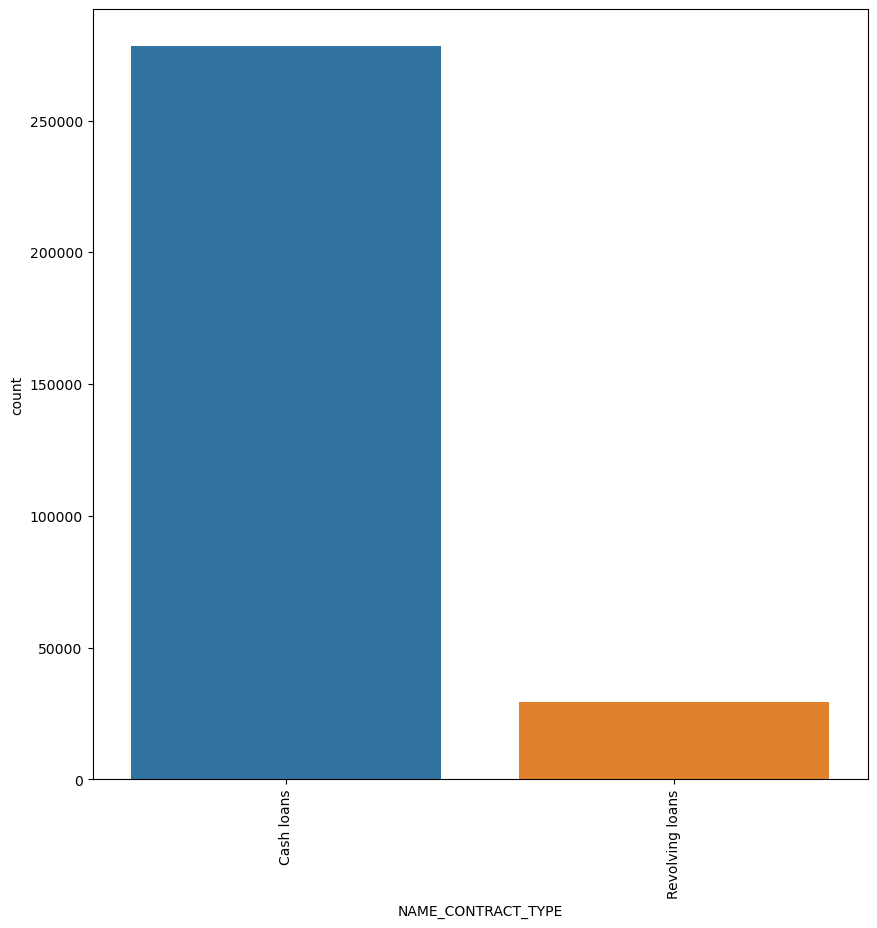

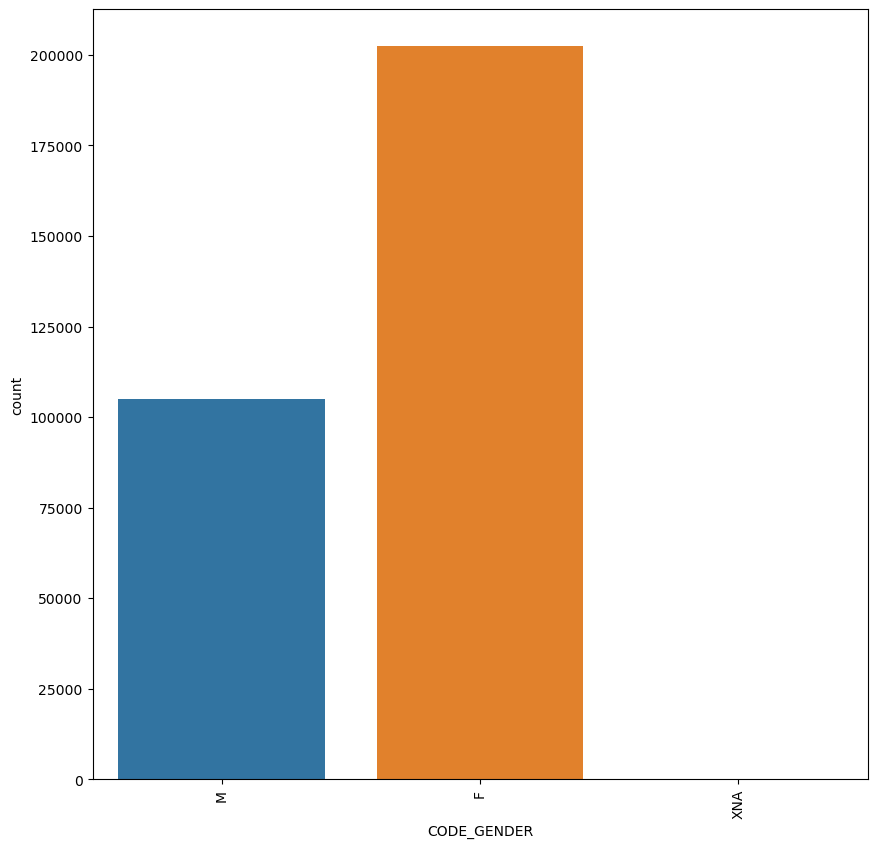

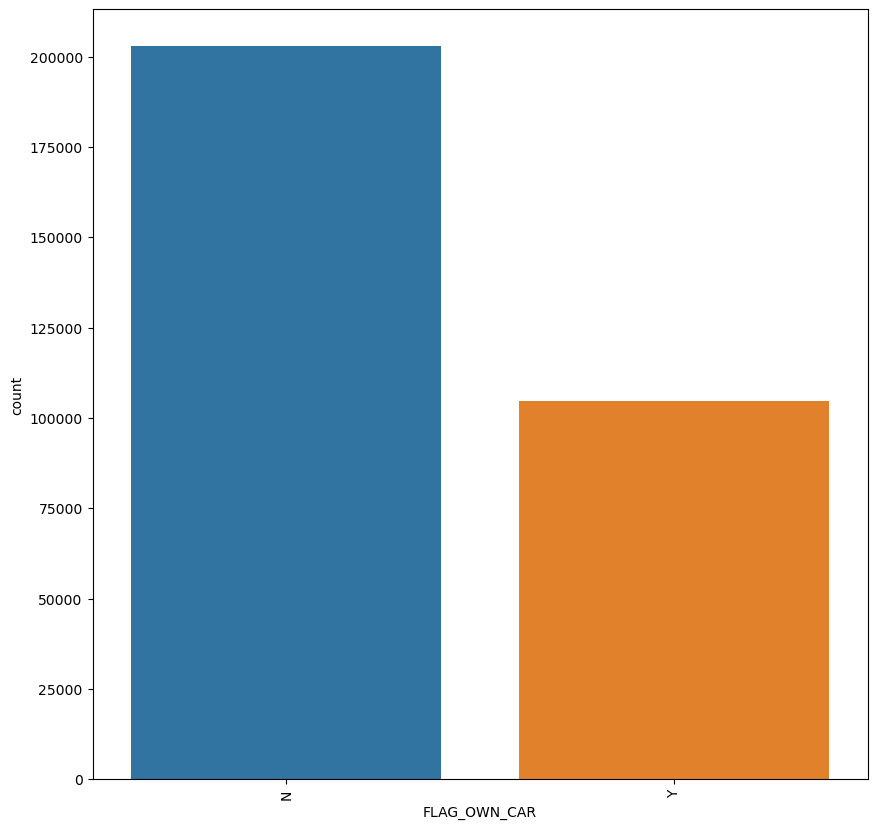

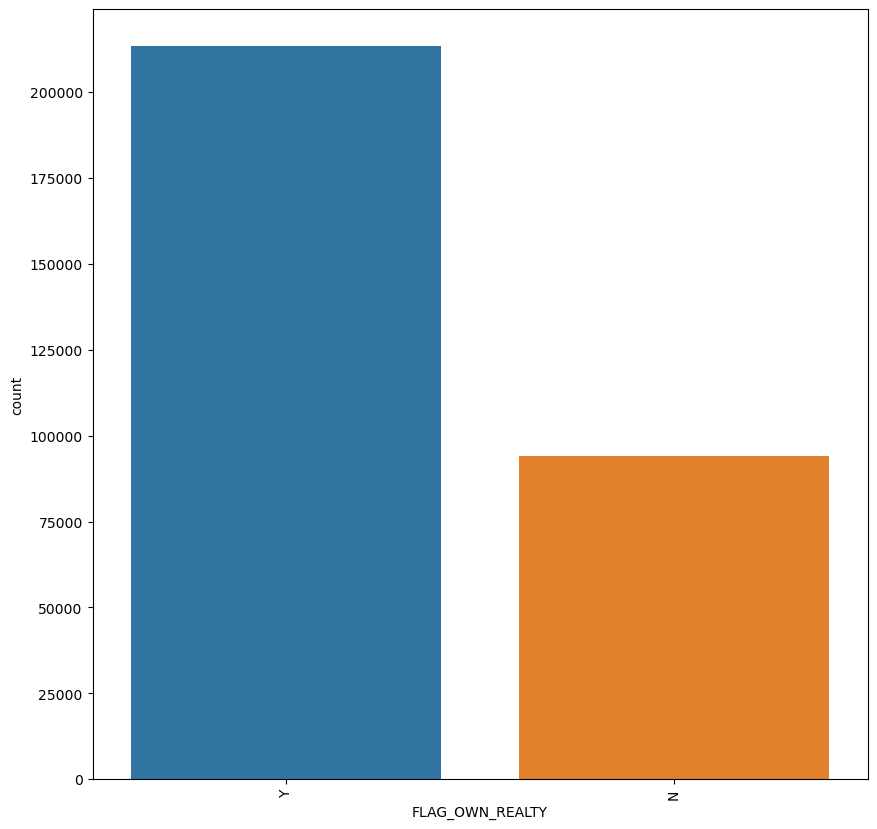

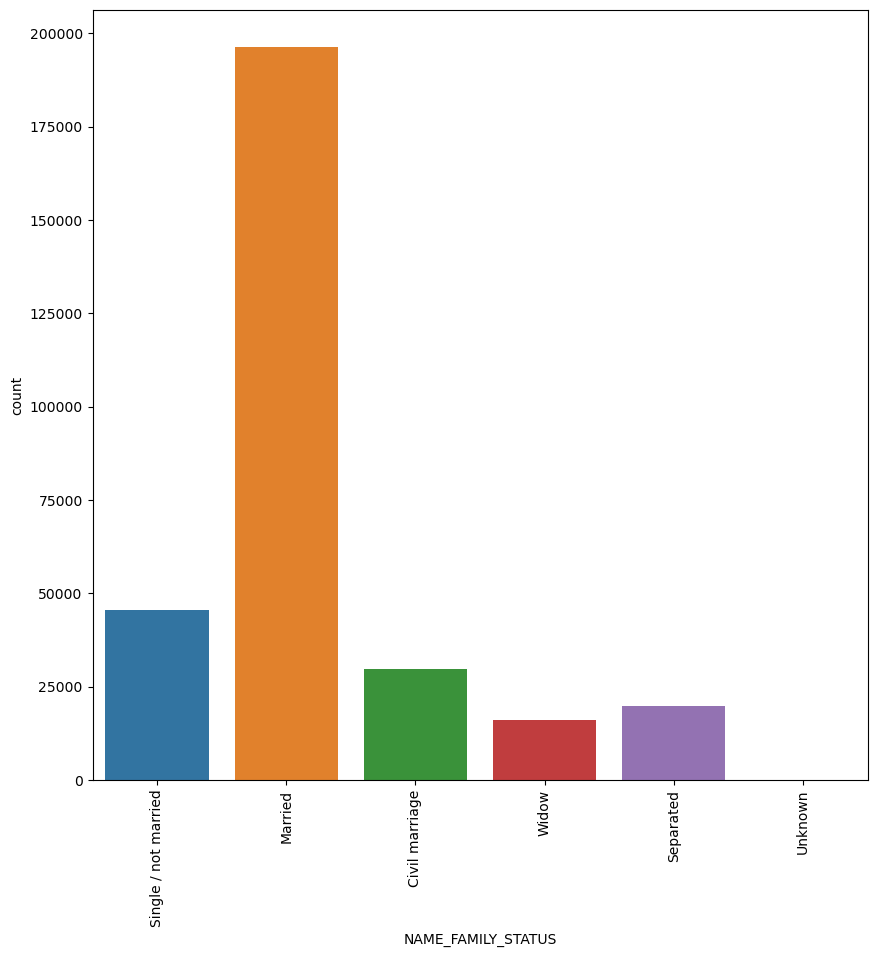

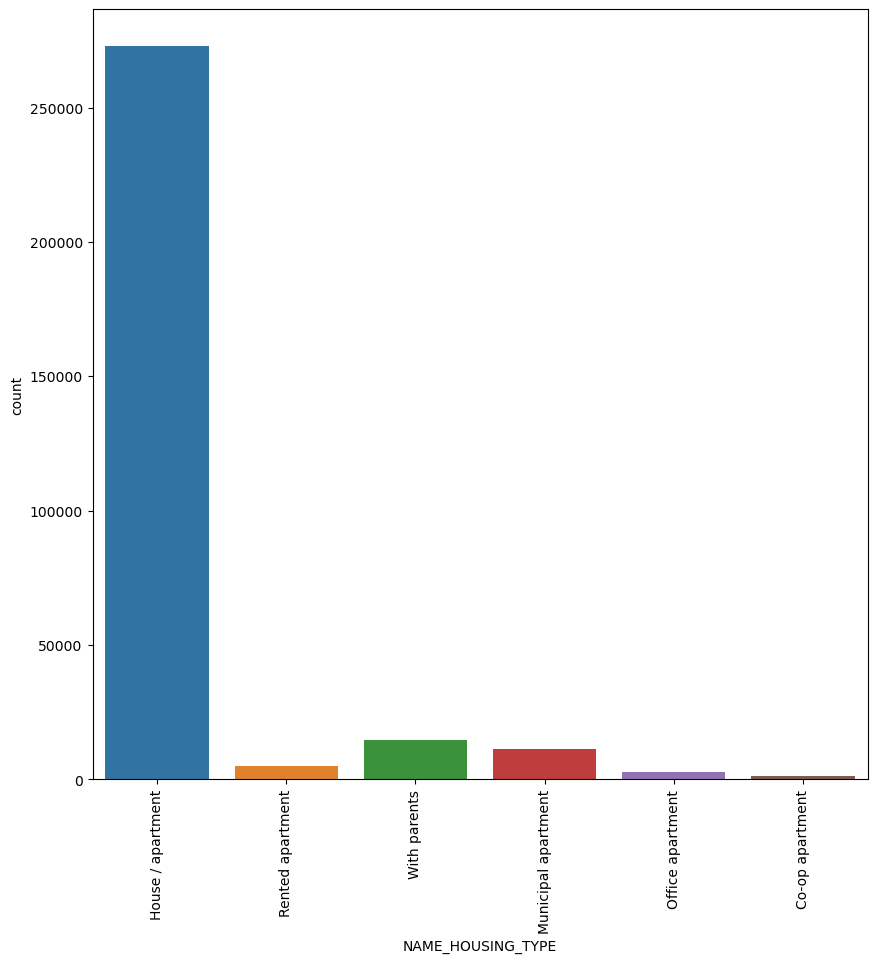

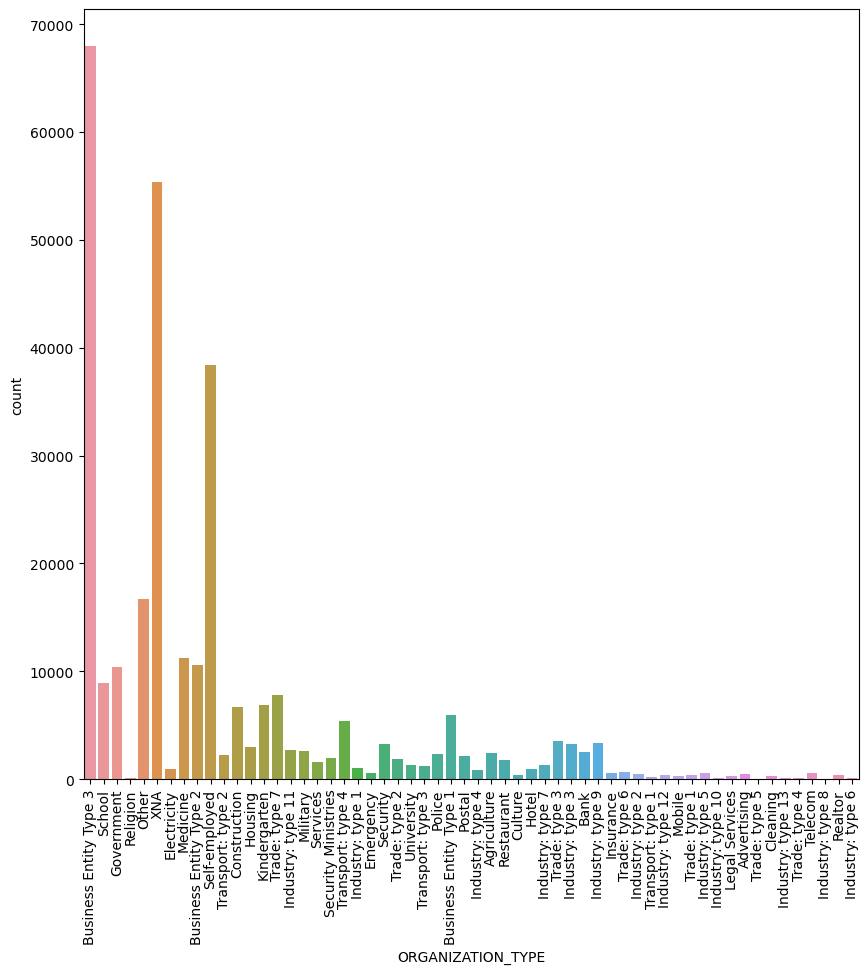

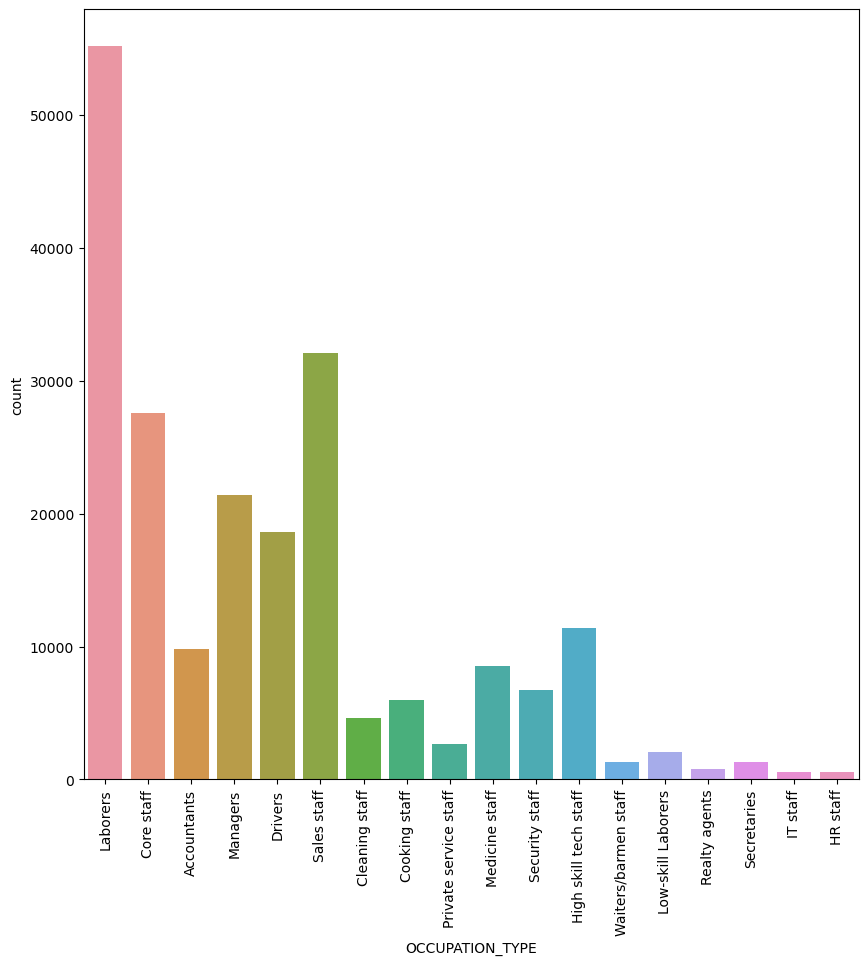

In [162]:
for i in c_col:
    plt.figure(figsize=(10,10))
    sns.countplot(data = app_df , x = i)
    plt.xticks(rotation=90)
    plt.show()

### Categorical ordered univariate analysis 

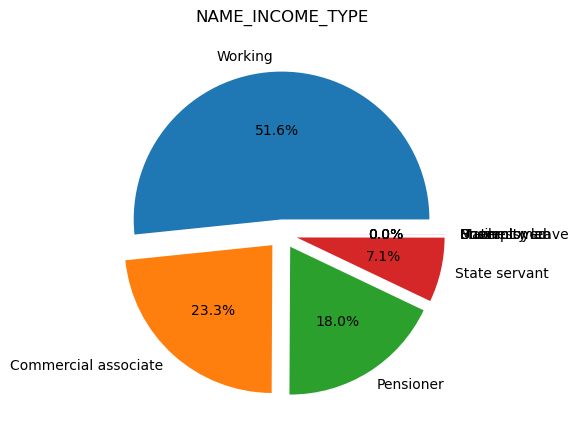

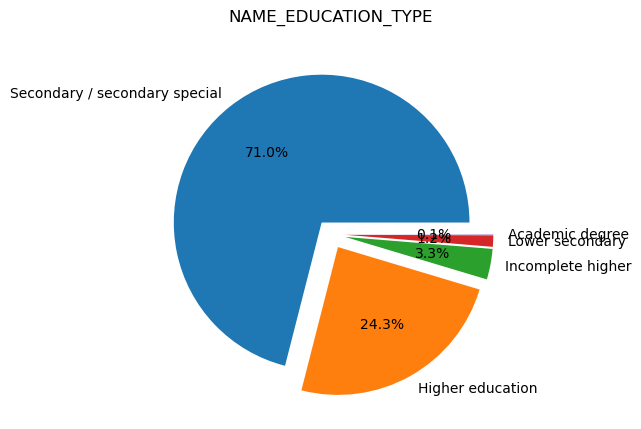

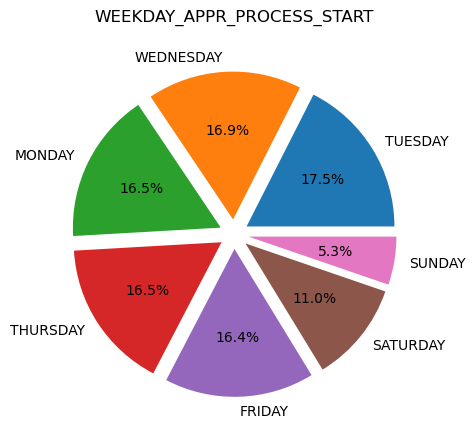

In [157]:
c_col = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START']


for i in c_col:
    d = app_df1[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%',explode=[0.1] * len(app_df1[i].unique()))
    d.set_title('')
    plt.title(i, pad=20) 
    plt.ylabel("")
    plt.show()


In [61]:
# observations from above 
#CODE_GENDER -> XNA to be checked

app_df1['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [62]:
app_df1[app_df1['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN      NAME_INCOME_TYPE  \
35657                Y             0               Working   
38566                Y             2               Working   
83382                Y             1               Working   
189640               Y             0  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  ... AMT_GOODS_PRICE  \
35657   Secondary / secondary special            Married  ...        337500.0   
38566   Secondary / secondary special            Married  ...        225000.0   
83382                Higher education            Married  ...        225000.0   
189640              Incomplete higher     Civil marriage  ...        900000.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
35657                          0.0                        0.0   
38566                          0.0                        0.0   
83382                          0.0                        0.0   
189640                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
35657                          0.0                       0.0   
38566                          0.0                       3.0   
83382                          0.0                       0.0   
189640                         0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CONTACT_INFO  \
35657                        0.0                         1.0           Yes   
38566                        0.0                         4.0           Yes   
83382                        0.0                         3.0           Yes   
189640                       1.0                         6.0           Yes   

        FLAG_DOC EXT_SOURCE  
35657         No   0.378740  
38566         No   0.510012  
83382         No   0.380380  
189640        No   0.557423  

[4 rows x 34 columns]

In [63]:
#Rows can be deleted as invalid gender and very less percentage of record

app_df1 = app_df1[~(app_df1['CODE_GENDER'] == 'XNA')]

In [64]:
#NAME_INCOME_TYPE

app_df1['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516317
Commercial associate    0.232892
Pensioner               0.180035
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

# people who are working avail the most loan 
# checking against those who do not own a home

plt.subplot(2,2,1)
app_df1[app_df1['NAME_INCOME_TYPE'] == 'Working']['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.barh()
plt.title('Working Realty check',fontsize=6)

plt.subplot(2,2,2)
app_df1[app_df1['NAME_INCOME_TYPE'] == 'Working']['FLAG_OWN_CAR'].value_counts(normalize=True).plot.barh()
plt.title('Working Car check',fontsize=6)

plt.subplot(2,2,3)
app_df1[(app_df1['NAME_INCOME_TYPE'] == 'Working') & (app_df1['NAME_FAMILY_STATUS'] == 'Married')]['FLAG_OWN_CAR'].value_counts(normalize=True).plot.barh()
plt.title('Working and married Car check',fontsize=6)

plt.subplot(2,2,4)
app_df1[(app_df1['NAME_INCOME_TYPE'] == 'Working') & (app_df1['NAME_FAMILY_STATUS'] == 'Married')]['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.barh()
plt.title('Working and married Realty check',fontsize=6)

plt.tight_layout() 
plt.show()

### Observations ###

- It can be seen that maximum number of people avail for Cash loans as per the data trend
- Percentage of Females availing the loan are higher , this is probably due to tax benefits , also invalid gender -     XNA was removed
- Majority of the people do not own a car.
    - This would suggest a high market for car loan in near future
    - 60% of working people do not own a car
    - More then 50% percent of working and married people do not own a car
- Around 30% of people do not own a house - suggesting market for home loans
    - Arounf 32% percent of people working , do not own a house 
    - More then 20% of woking and married people do not own a house
- People with Seconday Special have the highest applications
- Labouers are the ones who has the highest number of applications followed by sales staff
- Lowest number of applications are processed on weekends


###  Numerical univariate analysis 

In [66]:
c_col = [i for i in app_df.columns if app_df[i].dtype in ['int','float']]
l = [i for i in app_df1.columns if i in c_col]
l

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'OWN_CAR_AGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [67]:
#changing Days Birth and employed to years
app_df1['AGE'] = -app_df1['DAYS_BIRTH']/365

In [68]:
app_df1.drop('DAYS_BIRTH',axis=1,inplace=True)

In [69]:
app_df1['YOE'] = -app_df1['DAYS_EMPLOYED']/365

In [70]:
app_df1.loc[app_df1['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED'] = -app_df1[app_df1['DAYS_EMPLOYED']<0]['DAYS_EMPLOYED']

In [71]:
app_df1['YOE'] = app_df1['DAYS_EMPLOYED']/365

In [72]:
app_df1[['YOE','AGE','DAYS_EMPLOYED']].head(30)

YOE        AGE  DAYS_EMPLOYED
0      1.745205  25.920548            637
1      3.254795  45.931507           1188
2      0.616438  52.180822            225
3      8.326027  52.068493           3039
4      8.323288  54.608219           3038
5      4.350685  46.413699           1588
6      8.575342  37.747945           3130
7      1.230137  51.643836            449
8   1000.665753  55.065753         365243
9      5.531507  39.641096           2019
10     1.860274  27.936986            679
11  1000.665753  55.936986         365243
12     7.443836  36.819178           2717
13     8.295890  38.591781           3028
14     0.556164  39.953425            203
15     3.169863  23.912329           1157
16     3.608219  35.427397           1317
17     0.523288  26.783562            191
18    21.380822  48.542466           7804
19     5.583562  31.090411           2038
20    11.742466  50.005479           4286
21     4.526027  40.589041           1652
22    11.797260  30.536986           4306
23  1000.665753  68.019178         365243
24     2.043836  30.920548            746
25     9.572603  52.969863           3494
26     7.200000  51.298630           2628
27     3.380822  43.693151           1234
28     4.920548  27.380822           1796
29     2.767123  28.331507           1010

In [73]:
app_df1[['YOE','AGE','DAYS_EMPLOYED']].aggregate(['min','max','mean'])

YOE        AGE  DAYS_EMPLOYED
min      0.000000  20.517808       0.000000
max   1000.665753  69.120548  365243.000000
mean   185.549507  43.937061   67725.569893

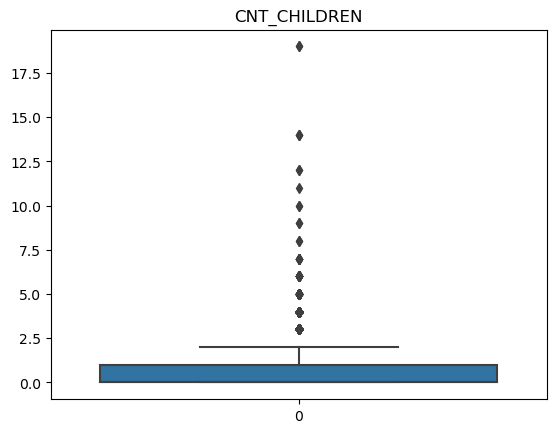

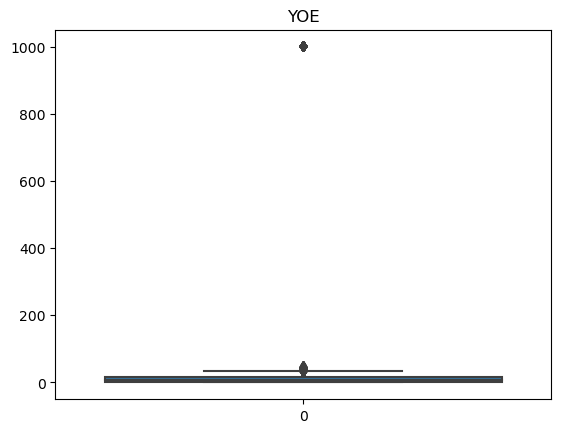

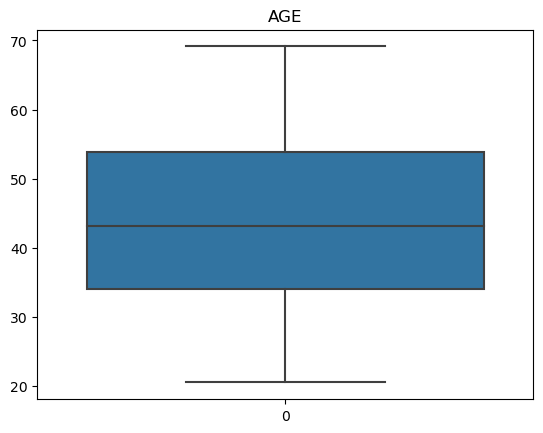

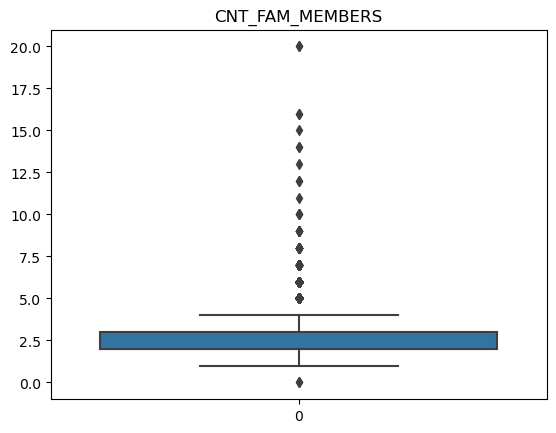

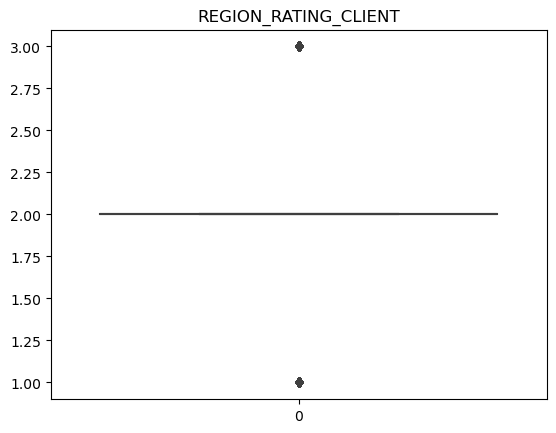

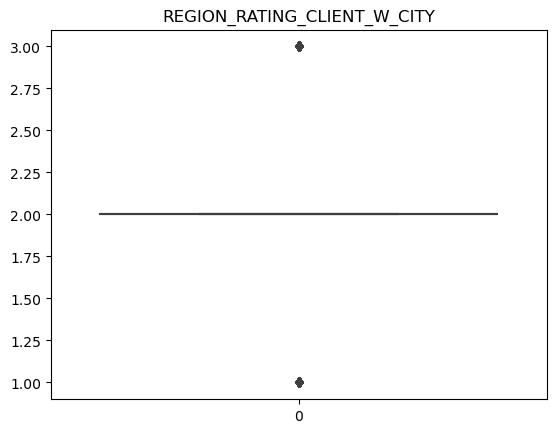

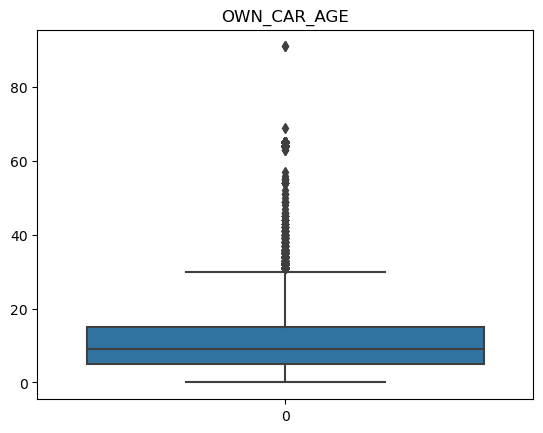

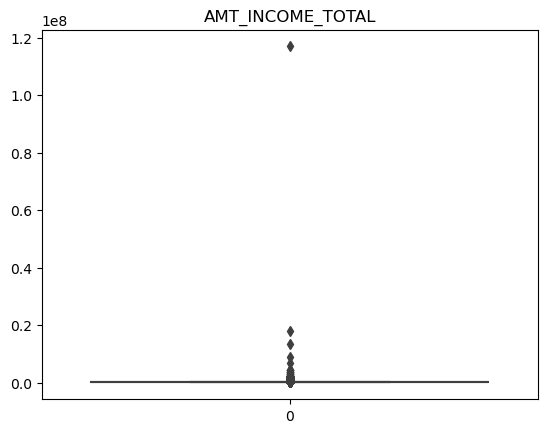

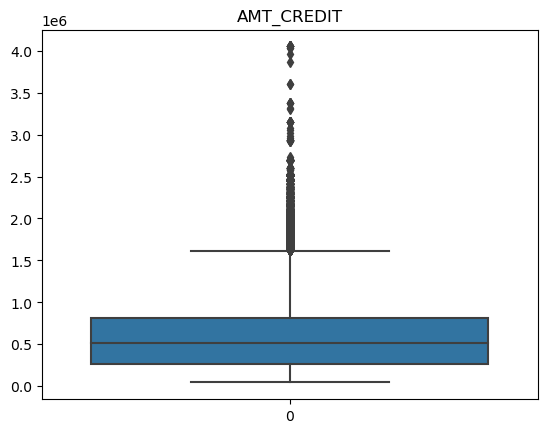

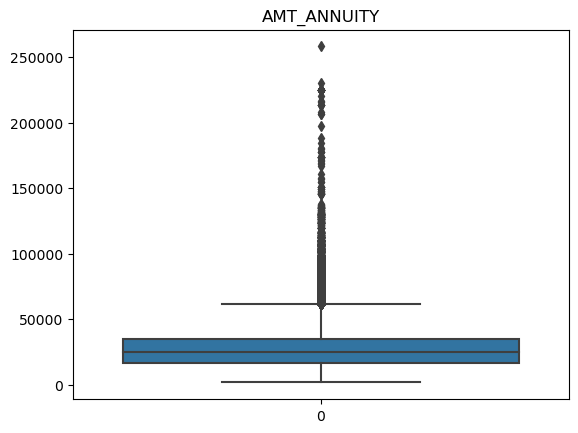

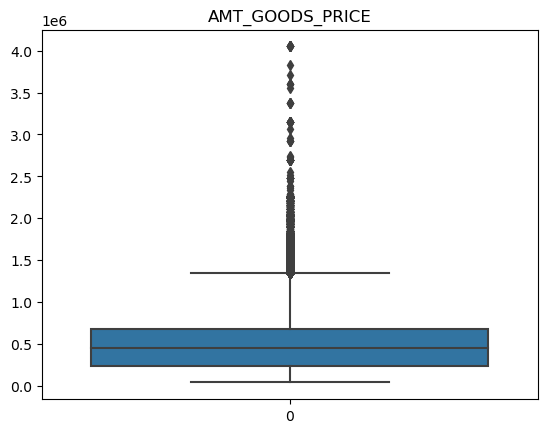

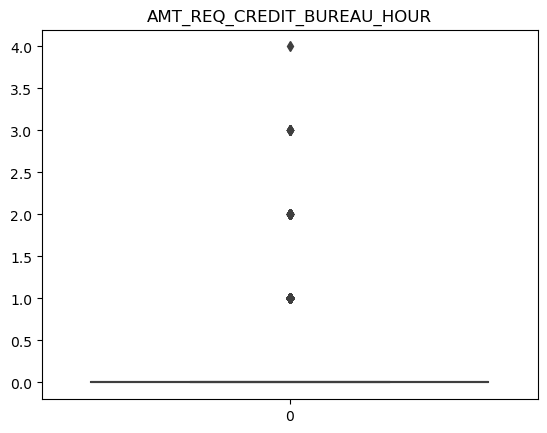

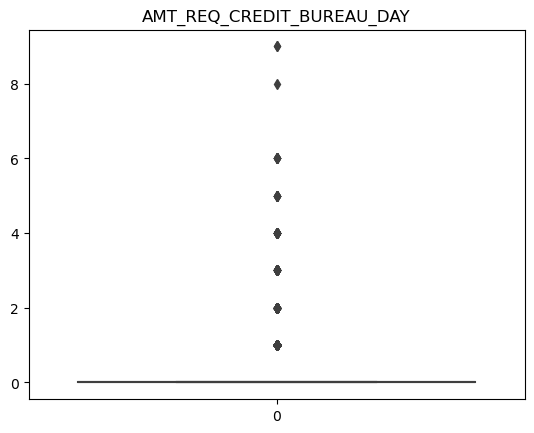

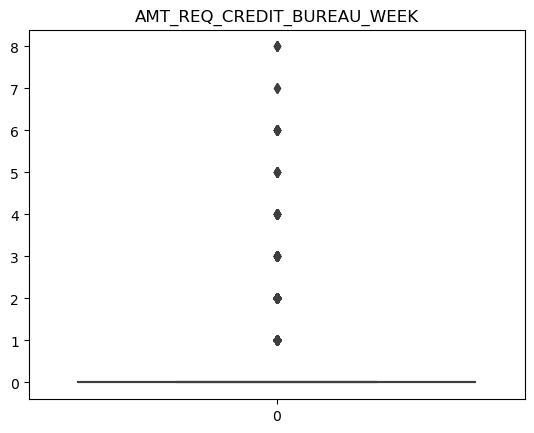

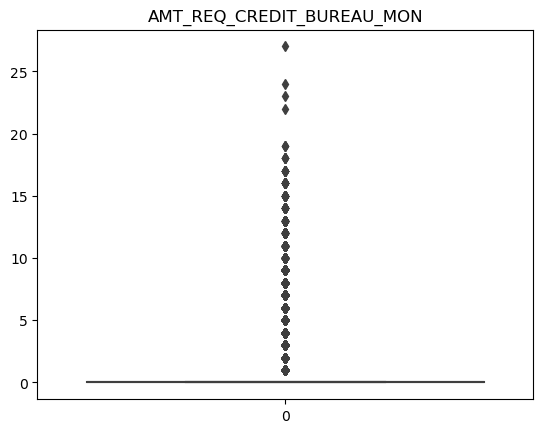

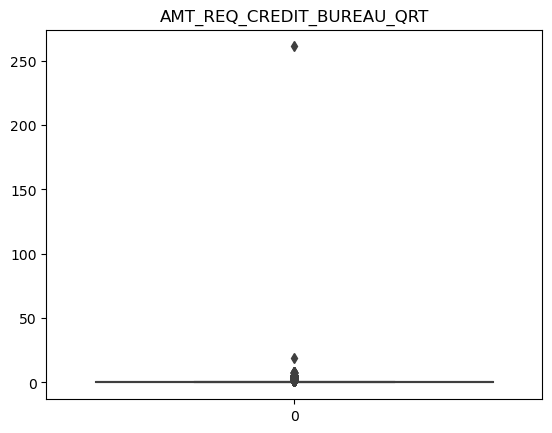

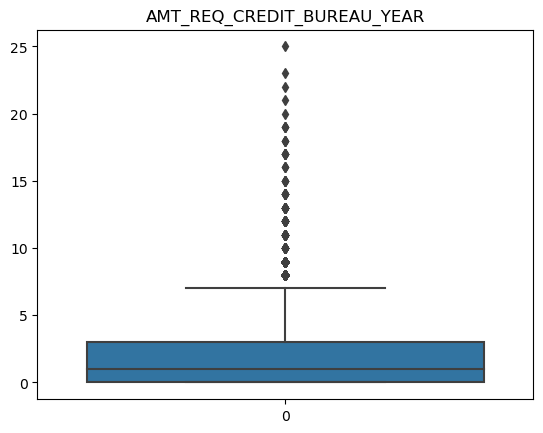

In [74]:
for i in ['CNT_CHILDREN','YOE','AGE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OWN_CAR_AGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
    sns.boxplot(app_df1[i])
    plt.title(i)
    plt.show()

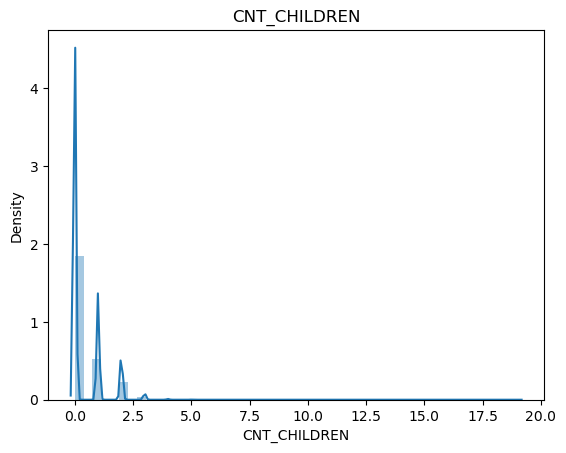

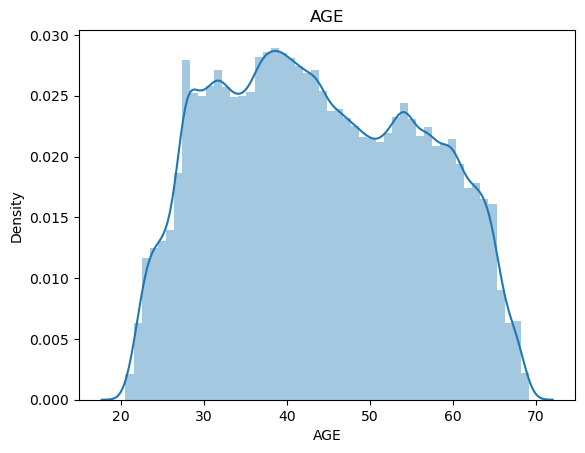

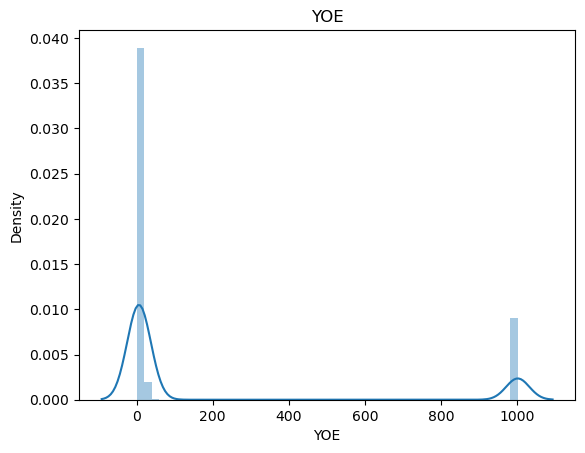

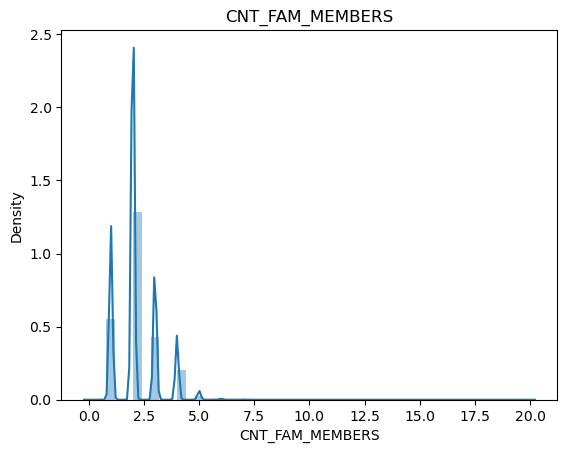

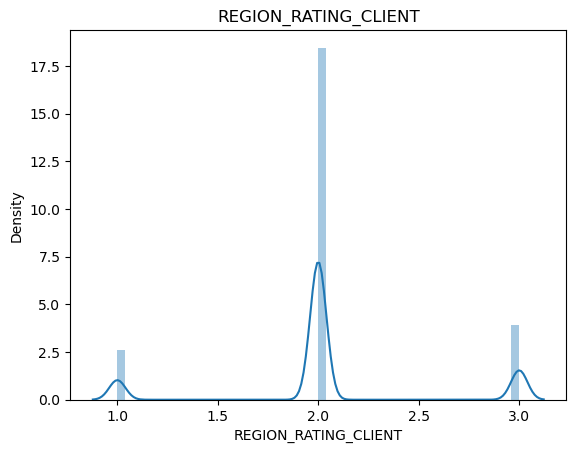

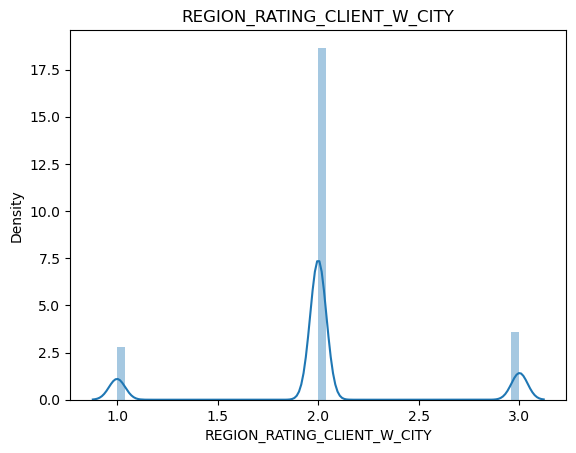

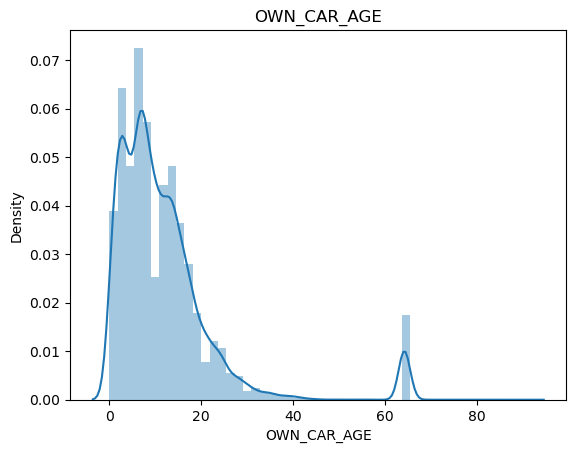

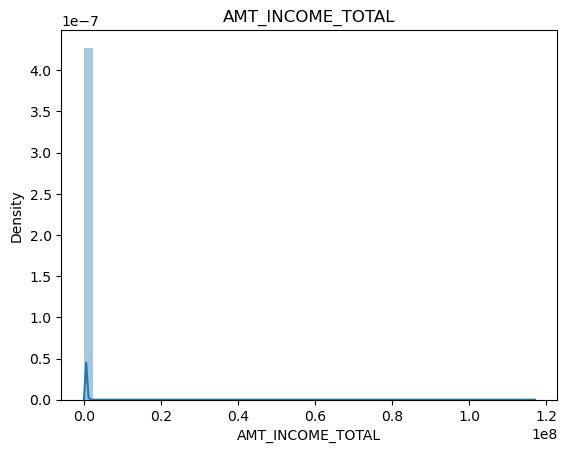

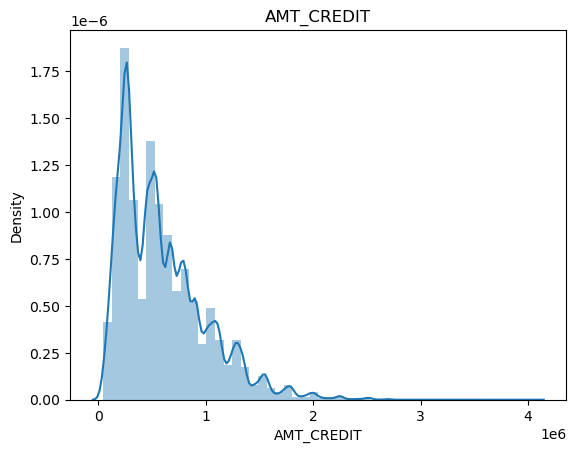

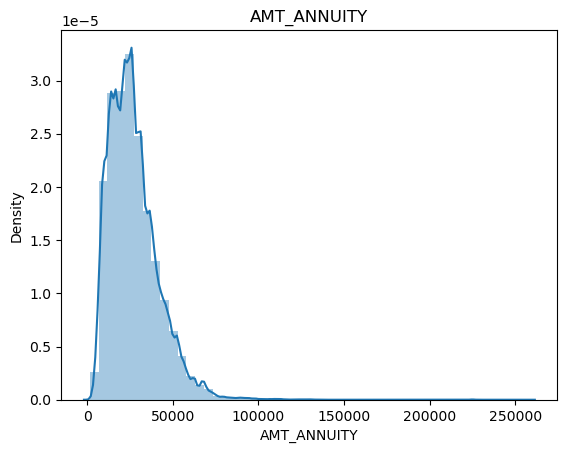

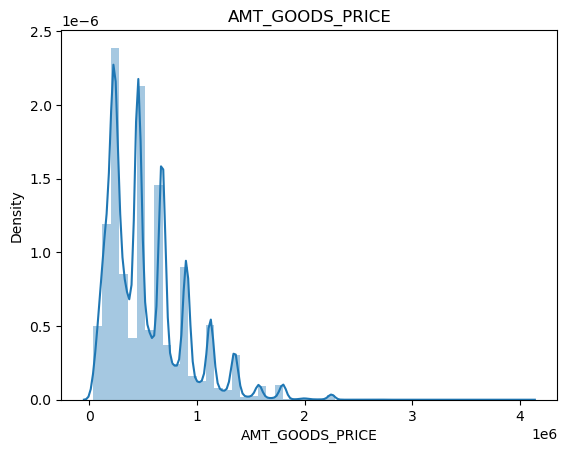

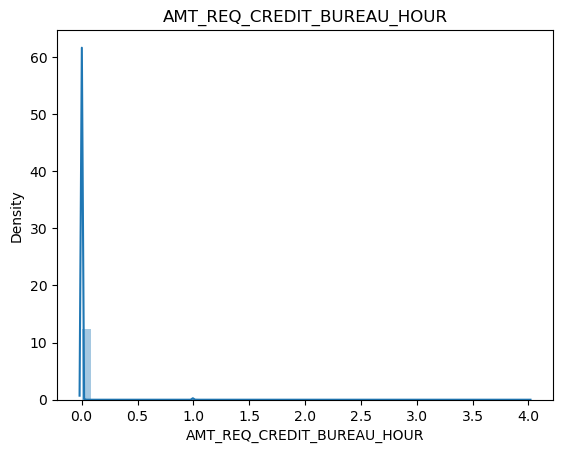

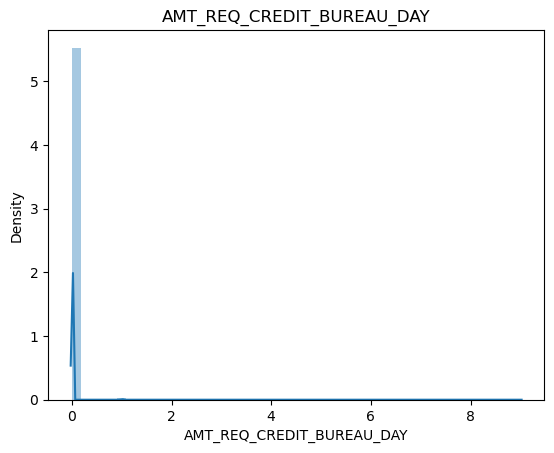

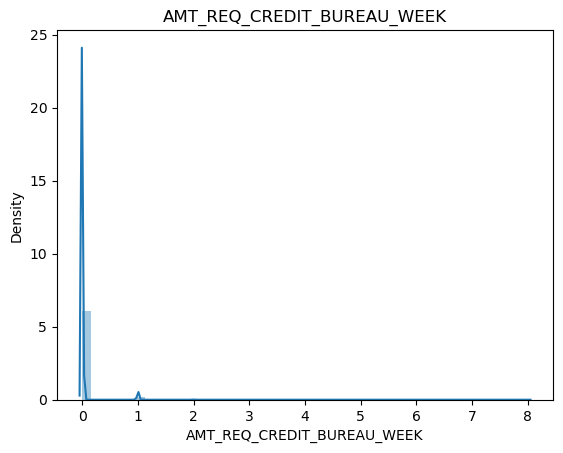

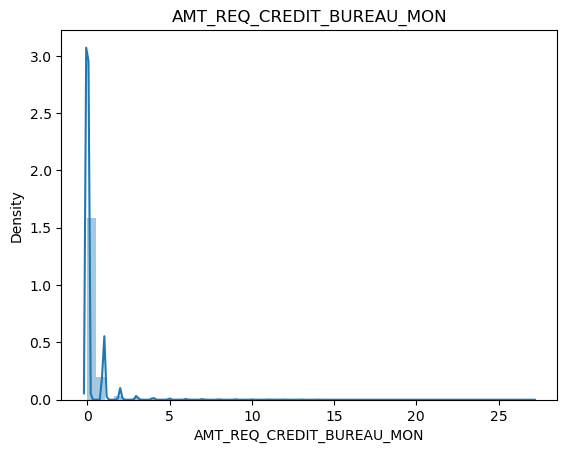

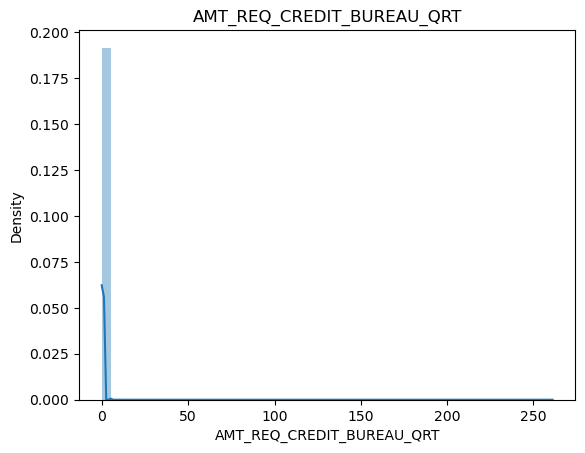

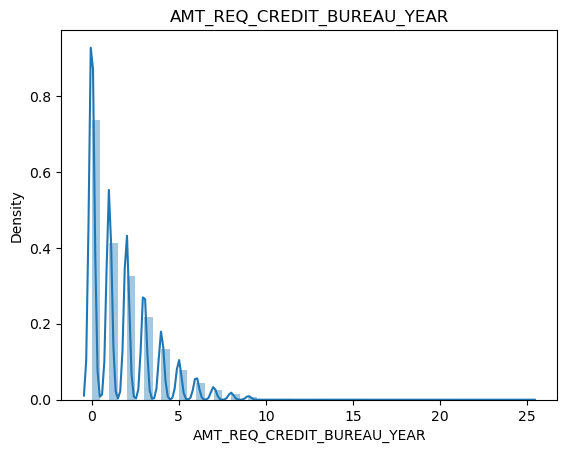

In [75]:
for i in ['CNT_CHILDREN','AGE','YOE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OWN_CAR_AGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
    sns.distplot(app_df1[i])
    plt.title(i)
    plt.show()

In [76]:
# checking percentage of people with more than 5 children is very less and are outliers in dataset
app_df1[app_df1['CNT_CHILDREN'] > 5]['CNT_CHILDREN'].count()/len(app_df1) * 100

0.013658225666407595

In [163]:
app_df1['AGE'].value_counts()

37.67    43
36.93    42
49.99    41
27.45    41
43.21    40
         ..
68.21     1
68.13     1
21.96     1
68.76     1
68.66     1
Name: AGE, Length: 17460, dtype: int64

In [77]:
# Checking number of people with more than 100 years of experience
app_df1[app_df1['YOE'] > 100]['YOE'].count()/len(app_df1) * 100

18.007394953610813

In [78]:
#18% percent of data has incorrect years of experience and are outliers in dataset.
app_df1[app_df1['YOE'] > app_df1['AGE']][['YOE','AGE']].count() / len(app_df1) * 100

YOE    18.007395
AGE    18.007395
dtype: float64

<Axes: ylabel='Frequency'>

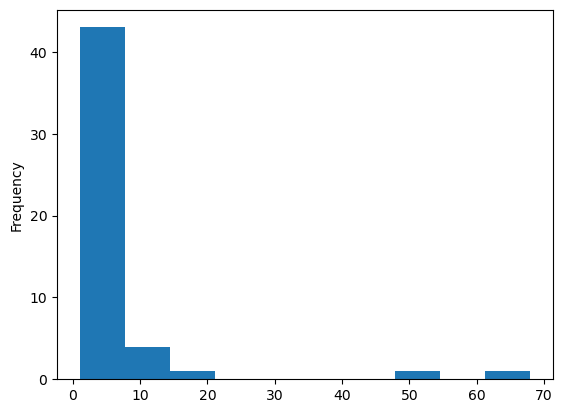

In [79]:
#Income of people 
app_df1[app_df1['AMT_INCOME_TOTAL'] > 1000000]['AMT_INCOME_TOTAL'].value_counts().plot.hist()


<Axes: ylabel='AMT_INCOME_TOTAL'>

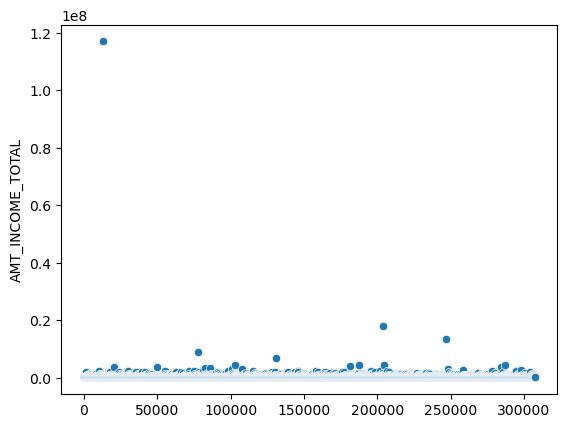

In [80]:
sns.scatterplot(app_df1['AMT_INCOME_TOTAL'])

In [81]:
app_df1[app_df1['AMT_INCOME_TOTAL'] < 40000]['AMT_INCOME_TOTAL']

11        38419.155
283       36000.000
495       31500.000
651       38250.000
990       38700.000
            ...    
305780    30150.000
306714    36000.000
306896    36000.000
307207    36000.000
307363    29250.000
Name: AMT_INCOME_TOTAL, Length: 963, dtype: float64

In [82]:
#defining a function for income level 

bins = [0, 180000, 360000, 720000, 1440000, 3600000, float('inf')]
labels = ['Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income', 'Upper Income', 'High Income']


app_df1['INCOME_LEVEL'] = pd.cut(app_df1['AMT_INCOME_TOTAL'],bins, labels= labels)


In [83]:
app_df1['INCOME_LEVEL'].value_counts()

Low Income             215582
Lower Middle Income     82423
Middle Income            8844
Upper Middle Income       574
Upper Income               73
High Income                11
Name: INCOME_LEVEL, dtype: int64

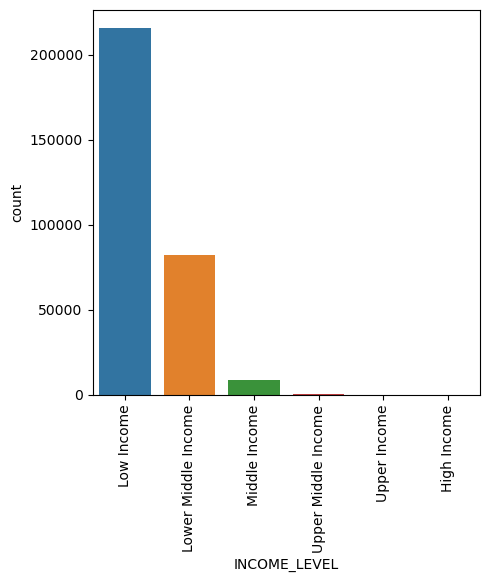

In [198]:
plt.figure(figsize=(5,5))
sns.countplot(data = app_df1 , x = 'INCOME_LEVEL')
plt.xticks(rotation=90)
plt.show()

In [85]:
#Majority of people below Middle Income group
#This would enable the bank to decide on the credit range
#Based on boxplot , the median credit range is ~ 5lakhs as shown below

<Axes: >

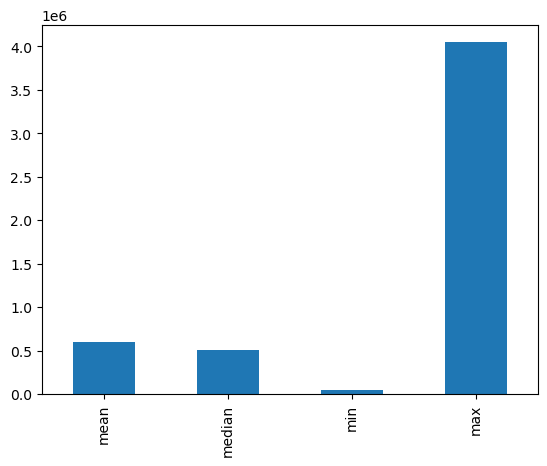

In [86]:
pd.options.display.float_format = '{:.2f}'.format
app_df1['AMT_CREDIT'].agg(['mean','median','min','max']).plot.bar()

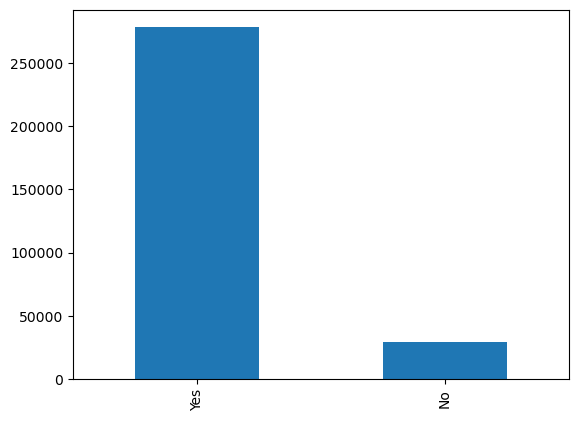

Yes   90.39
No     9.61
Name: FLAG_DOC, dtype: float64

In [87]:
app_df1['FLAG_DOC'].value_counts().plot.bar()
plt.show()
app_df1['FLAG_DOC'].value_counts()/len(app_df1) * 100

# 9% of applications have to document

## Previous application dataset cleaning and check

In [88]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [89]:
[i for i in prev_app_df.columns if prev_app_df[i].dtype == 'object']
    

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

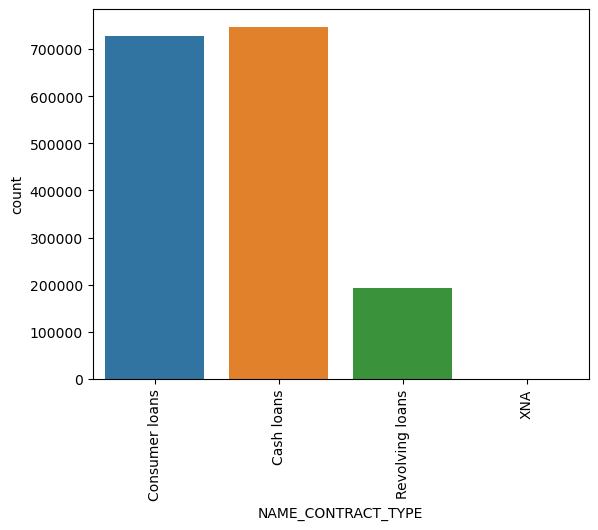

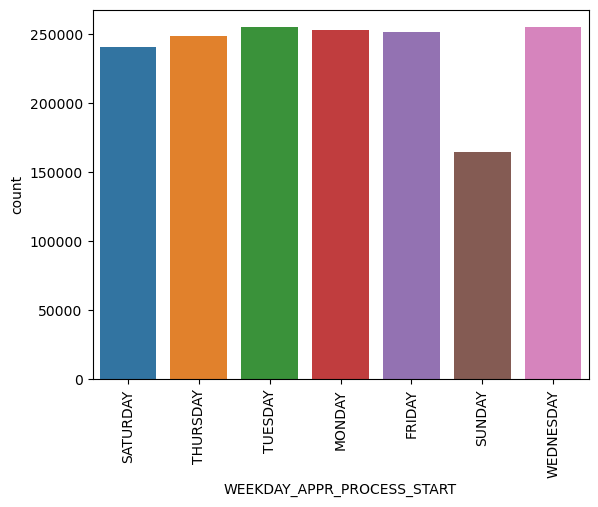

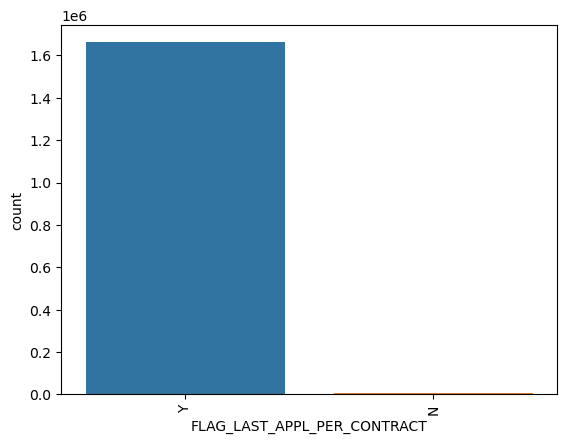

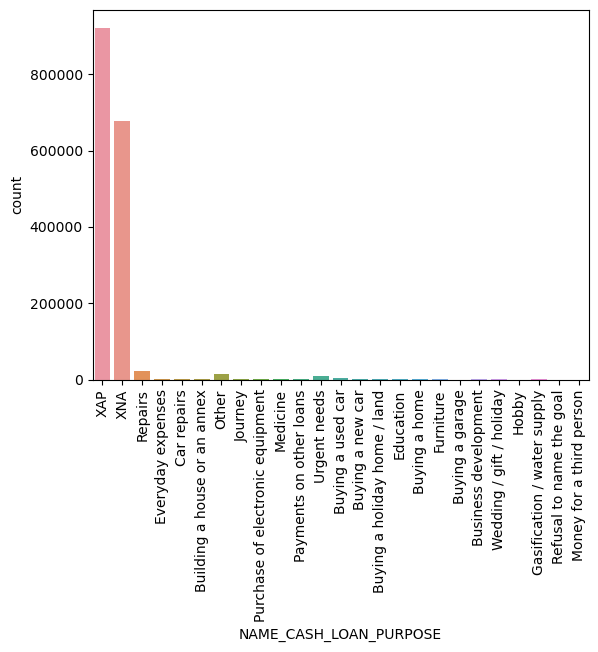

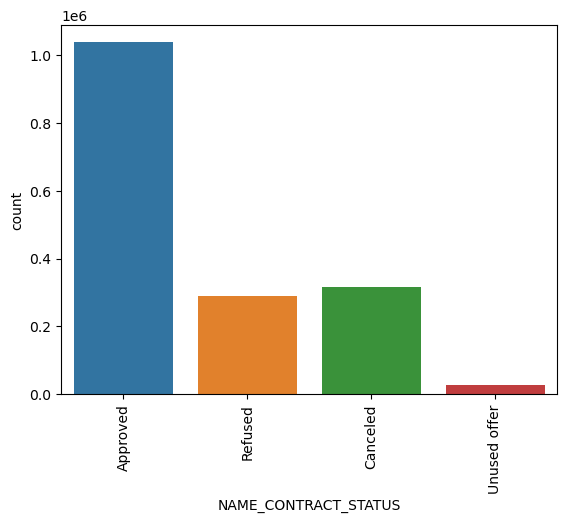

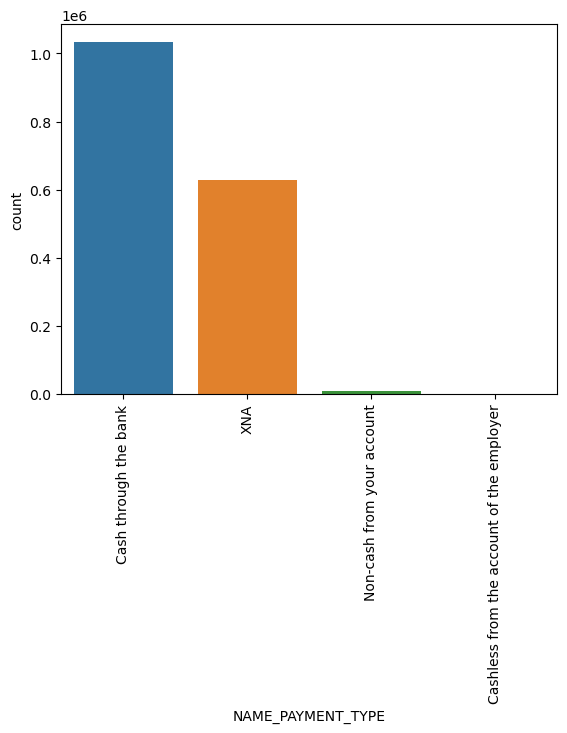

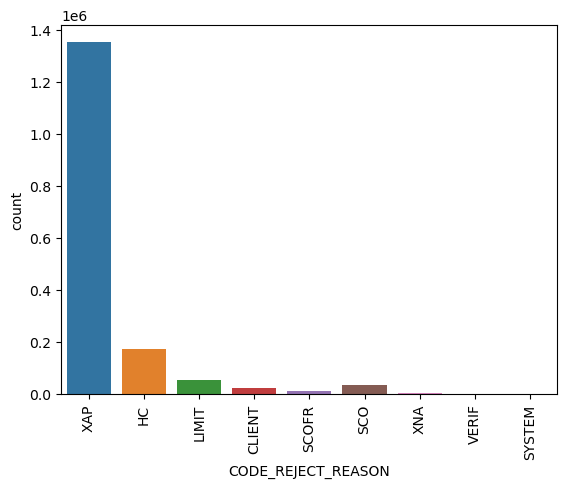

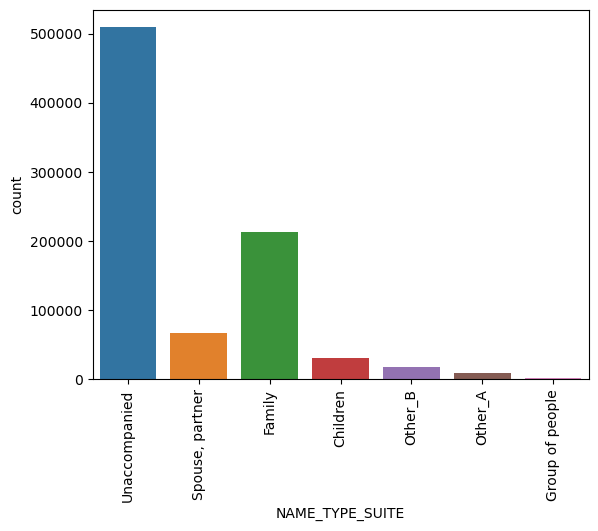

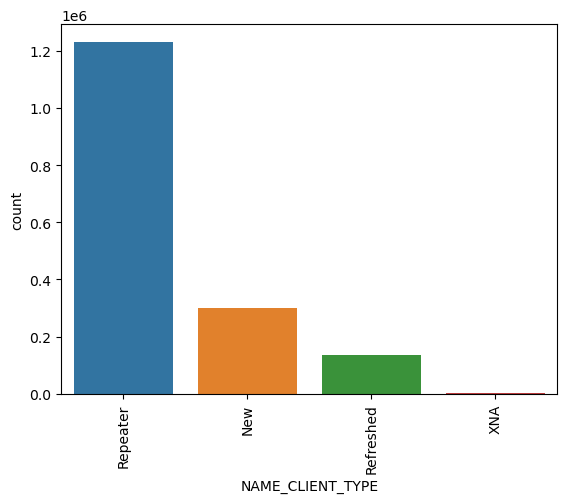

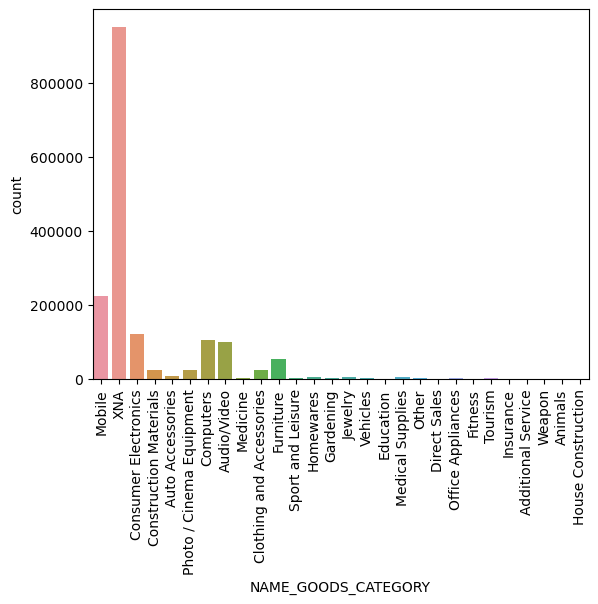

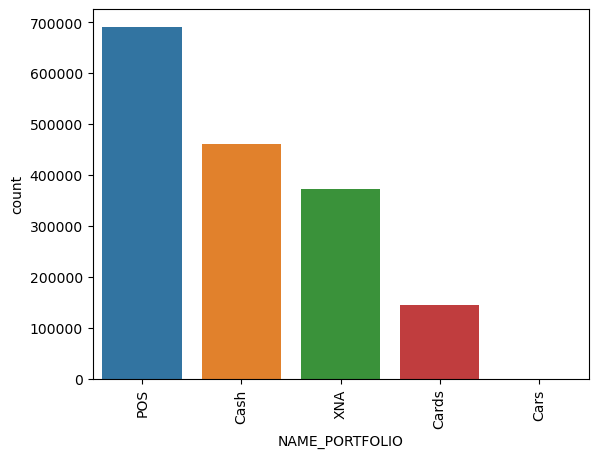

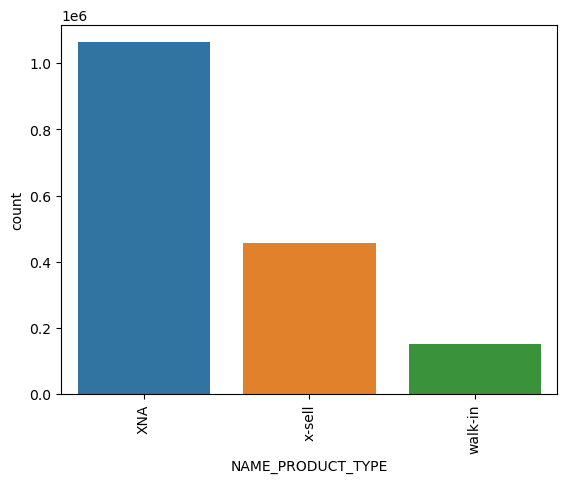

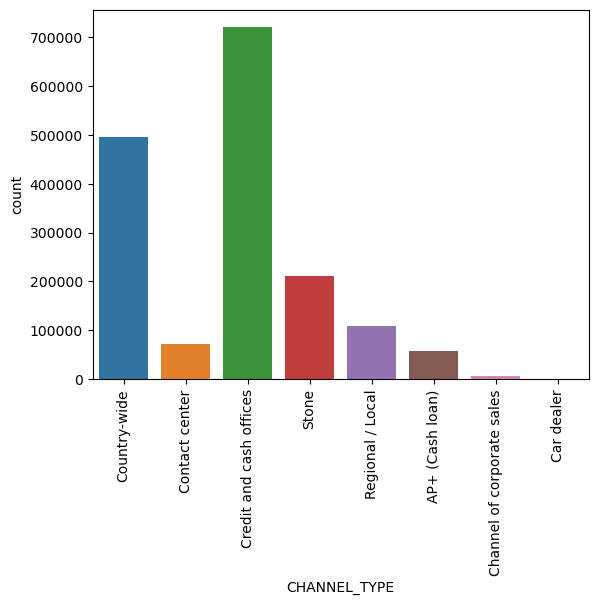

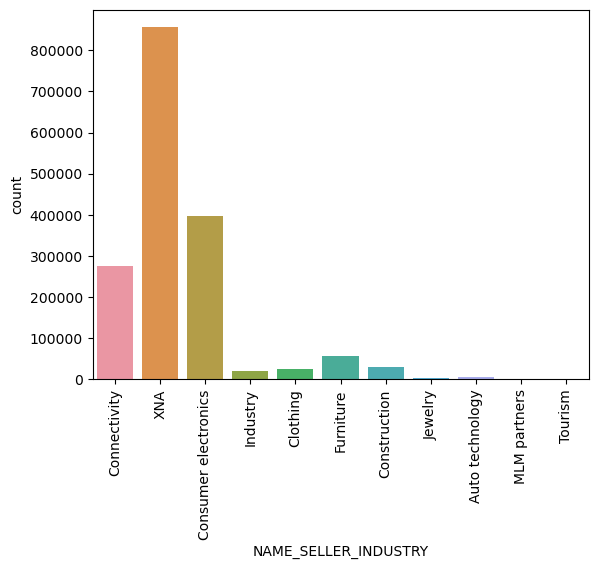

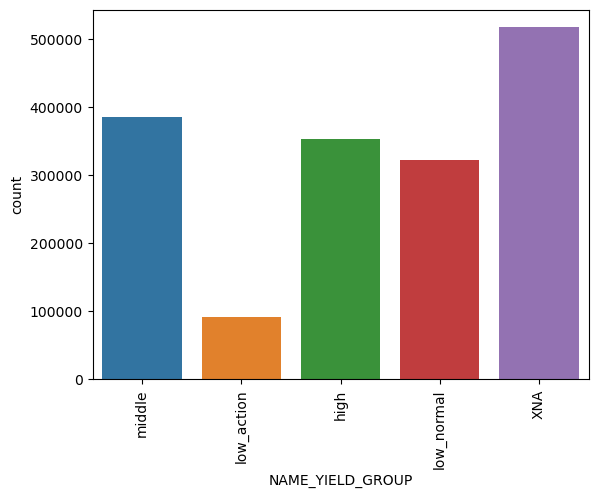

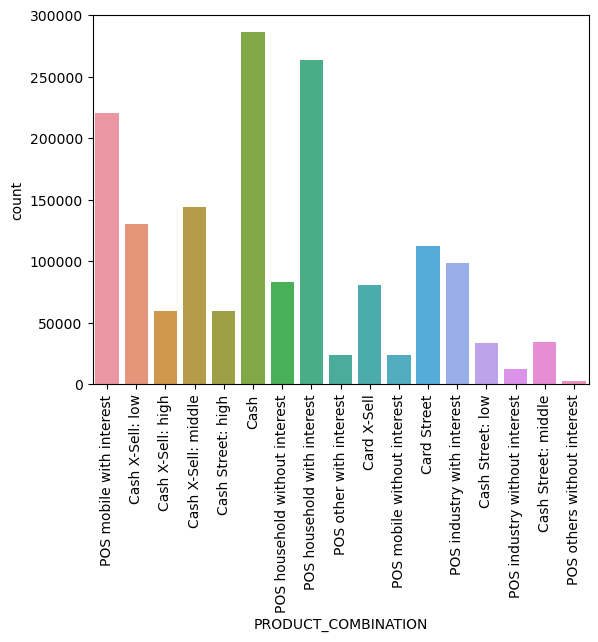

In [90]:
#plotting box

col = [i for i in prev_app_df.columns if prev_app_df[i].dtype == 'object']
for i in col:
    sns.countplot(data = prev_app_df , x = i)
    plt.xticks(rotation=90)
    plt.show()

In [91]:
#FLAG_LAST_APPL_PER_CONTRACT
prev_app_df['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()


Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [92]:
#Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
#remove rows which are redundant

prev_app_df = prev_app_df[~(prev_app_df['FLAG_LAST_APPL_PER_CONTRACT'] == 'N')]

In [93]:
prev_app_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100
#62% percent of previous applications were approved

Approved       62.39
Canceled       19.04
Refused        16.98
Unused offer    1.59
Name: NAME_CONTRACT_STATUS, dtype: float64

In [94]:
prev_app_df[prev_app_df['NAME_CONTRACT_STATUS'] == 'Approved']['CODE_REJECT_REASON'].value_counts()
# all rejection codes are populated

XAP    1036773
XNA          8
Name: CODE_REJECT_REASON, dtype: int64

In [95]:
prev_app_df[prev_app_df['NAME_CONTRACT_STATUS'] == 'Canceled']['CODE_REJECT_REASON'].value_counts()


XAP    316317
Name: CODE_REJECT_REASON, dtype: int64

In [96]:
#can be observed that rejection code is populated as either XAP or XNA for Approved loans as well as Canceled with same code
#This needs to be corrected else will lead to incorrect analysis

In [97]:
prev_app_df['NAME_CLIENT_TYPE'].value_counts(normalize = True) * 100
# 73% of clients are repeat clients , thats shows the quality of service

Repeater    73.63
New         18.13
Refreshed    8.12
XNA          0.12
Name: NAME_CLIENT_TYPE, dtype: float64

In [98]:
prev_app_df[prev_app_df['NAME_CLIENT_TYPE'] == 'Repeater']['NAME_CONTRACT_STATUS'].value_counts(normalize = True) * 100
# Around 53% of applications of repeat clients are approved 

Approved       53.77
Canceled       23.89
Refused        20.69
Unused offer    1.66
Name: NAME_CONTRACT_STATUS, dtype: float64

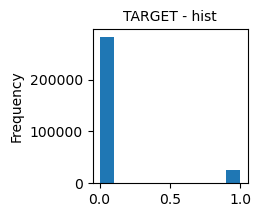

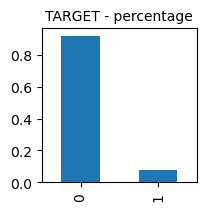

In [195]:
#Data imbalance on Target 
plt.figure(figsize=(2,2))
app_df1['TARGET'].plot.hist()
plt.title('TARGET - hist',fontsize=10)
plt.show()
#Mximum people are with 

plt.figure(figsize=(2,2))
app_df1['TARGET'].value_counts(normalize=True).plot.bar()
plt.title('TARGET - percentage',fontsize=10)
plt.show()

## Bivariate and Multivariate Analysis

In [100]:
#combining 
app_df2 = app_df1.merge(prev_app_df , on ='SK_ID_CURR',how ='inner')

#### Numerical vs Numerical

In [101]:
app_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406336 entries, 0 to 1406335
Data columns (total 72 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1406336 non-null  int64   
 1   TARGET                        1406336 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1406336 non-null  object  
 3   CODE_GENDER                   1406336 non-null  object  
 4   FLAG_OWN_CAR                  1406336 non-null  object  
 5   FLAG_OWN_REALTY               1406336 non-null  object  
 6   CNT_CHILDREN                  1406336 non-null  int64   
 7   NAME_INCOME_TYPE              1406336 non-null  object  
 8   NAME_EDUCATION_TYPE           1406336 non-null  object  
 9   NAME_FAMILY_STATUS            1406336 non-null  object  
 10  NAME_HOUSING_TYPE             1406336 non-null  object  
 11  REGION_POPULATION_RELATIVE    1406336 non-null  float64 
 12  DAYS_EMPLOYED 

In [102]:
#income vs credit 

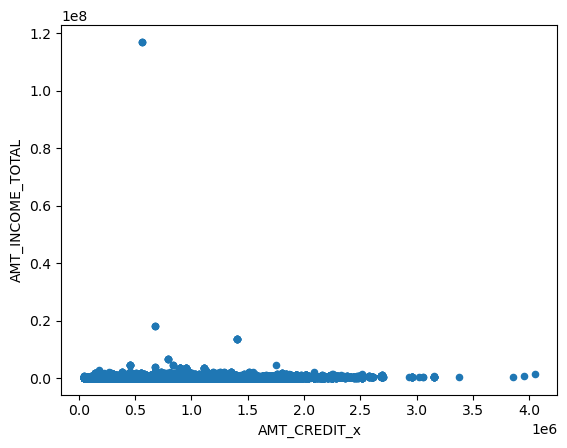

AMT_CREDIT_x  AMT_INCOME_TOTAL
AMT_CREDIT_x              1.00              0.17
AMT_INCOME_TOTAL          0.17              1.00

In [103]:
#plot the scatter plot of balance and age variable in inp1
app_df2.plot.scatter(x='AMT_CREDIT_x', y='AMT_INCOME_TOTAL')
plt.show()
app_df2[['AMT_CREDIT_x','AMT_INCOME_TOTAL']].corr()

In [104]:
#It can be observed that no proper correlation exists between income and credit 

In [105]:
app_df2['INCOME_LEVEL'].value_counts()

Low Income             947809
Lower Middle Income    415881
Middle Income           40593
Upper Middle Income      1850
Upper Income              171
High Income                32
Name: INCOME_LEVEL, dtype: int64

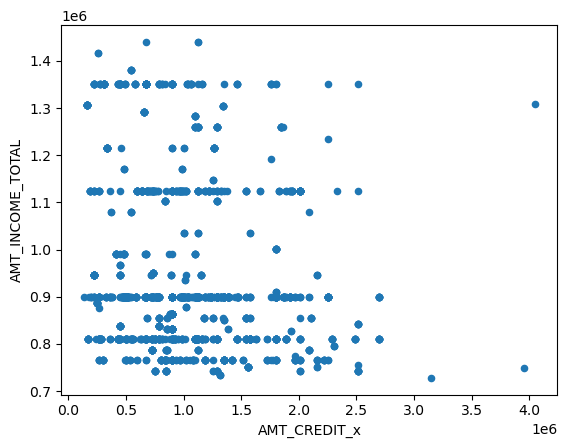

AMT_CREDIT_x  AMT_INCOME_TOTAL
AMT_CREDIT_x              1.00             -0.18
AMT_INCOME_TOTAL         -0.18              1.00

In [106]:
#It can be observed that no proper correlation exists between income and credit 
df = app_df2[app_df2['INCOME_LEVEL'] == 'Upper Middle Income']
df.plot.scatter(x='AMT_CREDIT_x', y='AMT_INCOME_TOTAL')
plt.show()
df[['AMT_CREDIT_x','AMT_INCOME_TOTAL']].corr()

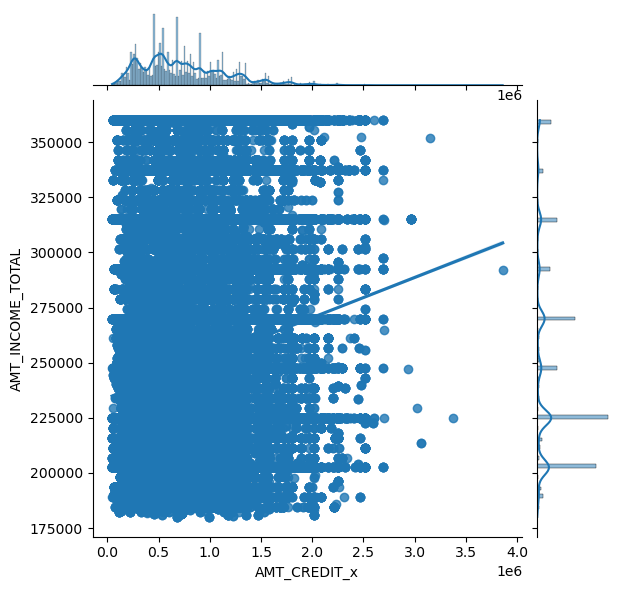

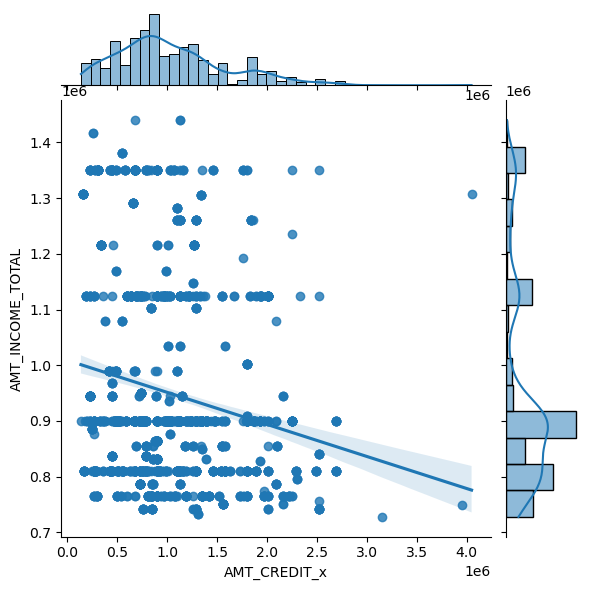

In [107]:
sns.jointplot(data=app_df2[app_df2['INCOME_LEVEL'] == 'Lower Middle Income'], x='AMT_CREDIT_x', y="AMT_INCOME_TOTAL", kind="reg")
plt.show()
sns.jointplot(data=app_df2[app_df2['INCOME_LEVEL'] == 'Upper Middle Income'], x='AMT_CREDIT_x', y="AMT_INCOME_TOTAL", kind="reg")
plt.show()

In [108]:
# a negetive correlation can be observed , on income and credit for upper income whereas opposite in lower income

In [110]:
# Though a slighlty positivie correleation can be observed in both income group

In [ ]:
df = app_df2[(app_df2['YOE'] < 100) & (app_df2['INCOME_LEVEL'] == 'Low Income')]

#app_df2['YOE'].value_counts()
sns.pairplot(df[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AGE','YOE','AMT_CREDIT_y']])
plt.show()


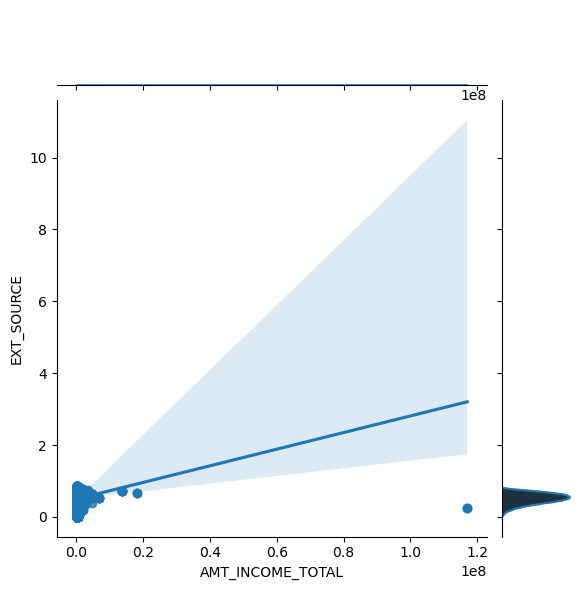

In [213]:
#income vs credit rating
sns.jointplot(data=app_df2[['AMT_INCOME_TOTAL','EXT_SOURCE']], x='AMT_INCOME_TOTAL', y="EXT_SOURCE", kind="reg")
plt.show()

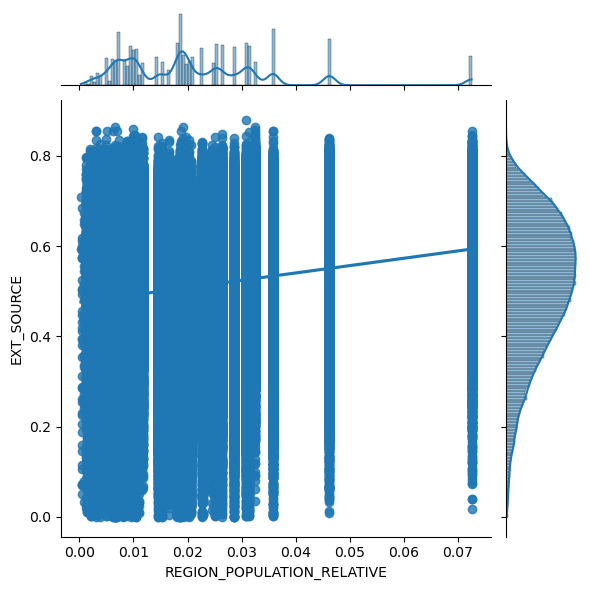

In [113]:
#REGION_POPULATION_RELATIVE vs AMT_INCOME_TOTAL vs AMT_CREDIT_x vs EXT_SOURCE
#sns.pairplot(app_df1[['REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE']])
#plt.show()


sns.jointplot(data=app_df1, x='REGION_POPULATION_RELATIVE', y="EXT_SOURCE", kind="reg")
plt.show()

<Axes: >

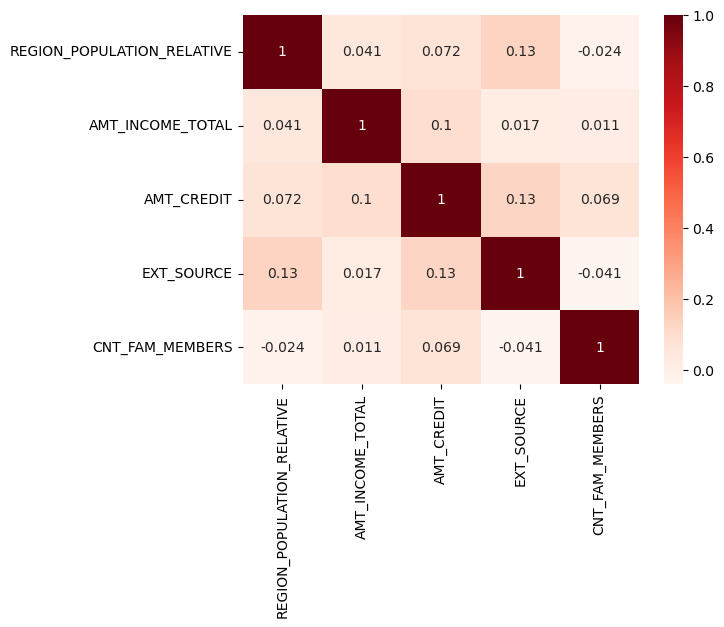

In [114]:
df = app_df1[(app_df1['INCOME_LEVEL'] == 'Low Income') | (app_df2['INCOME_LEVEL'] == 'Lower Middle Income') |  (app_df2['INCOME_LEVEL'] =='Middle Income')]
sns.heatmap(data=df[['REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE','CNT_FAM_MEMBERS']].corr() , annot=True, cmap= "Reds")


<Axes: >

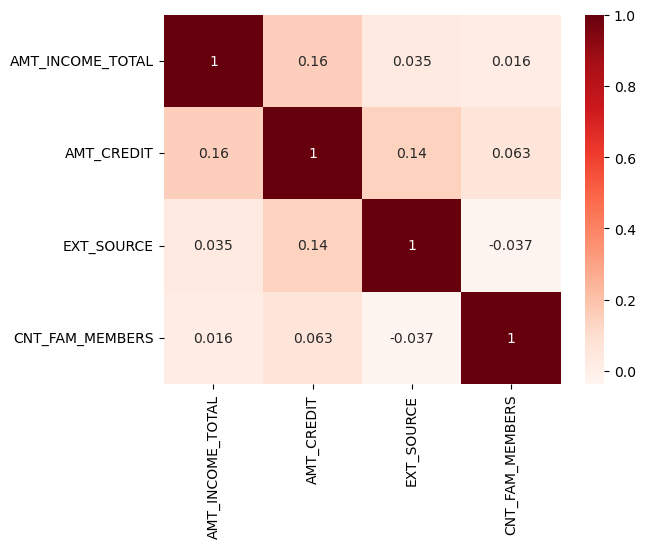

In [115]:
sns.heatmap(data=app_df1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE','CNT_FAM_MEMBERS']].corr() , annot=True, cmap= "Reds")


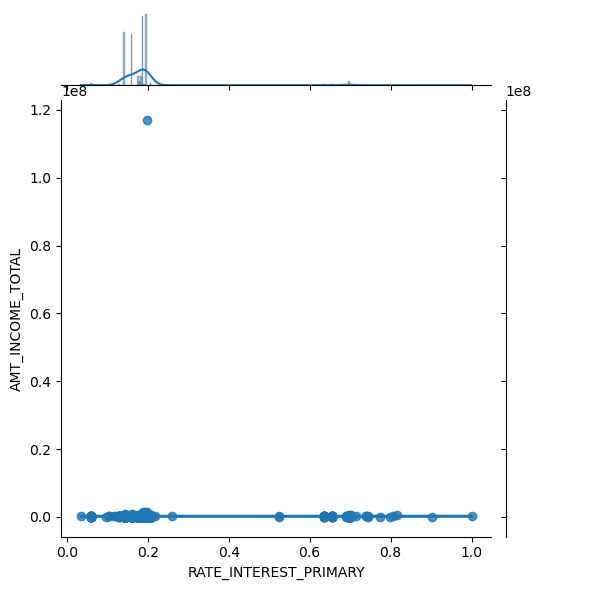

In [116]:
sns.jointplot(data=app_df2, x='RATE_INTEREST_PRIMARY', y="AMT_INCOME_TOTAL", kind="reg")
plt.show()

### Numerical categorical variable

In [349]:
inq_col = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

app_df1['AMT_REQ_CREDIT_BUREAU_TOTAL'] = app_df1[inq_col].sum(axis=1)
app_df2['AMT_REQ_CREDIT_BUREAU_TOTAL'] = app_df2[inq_col].sum(axis=1)


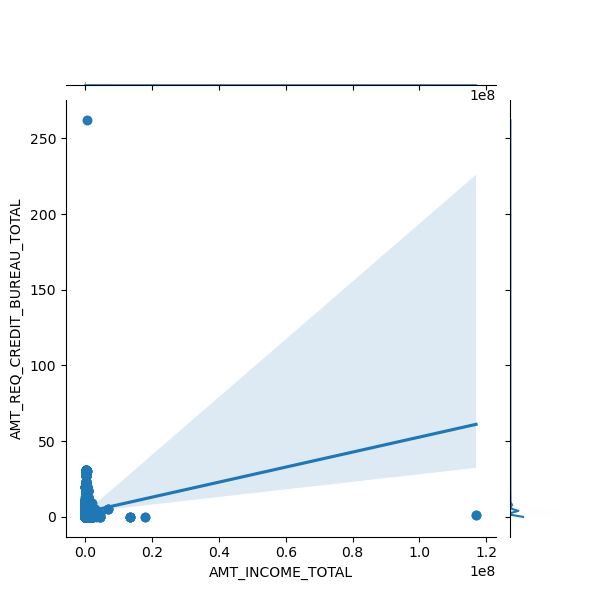

In [118]:
sns.jointplot(data=app_df2, x='AMT_INCOME_TOTAL', y="AMT_REQ_CREDIT_BUREAU_TOTAL", kind="reg")
plt.show()

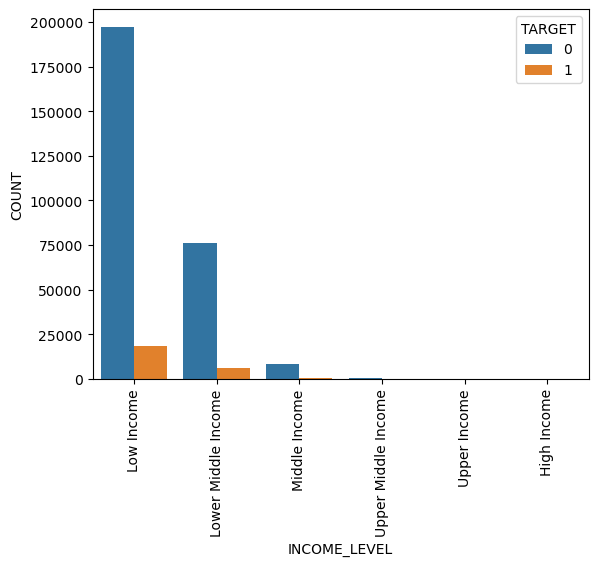

In [333]:
df= app_df1.groupby(by=['INCOME_LEVEL','TARGET']).size().reset_index(name='COUNT')
sns.barplot(x='INCOME_LEVEL', y='COUNT', hue='TARGET', data=df)
plt.xticks(rotation = 90)
plt.show()

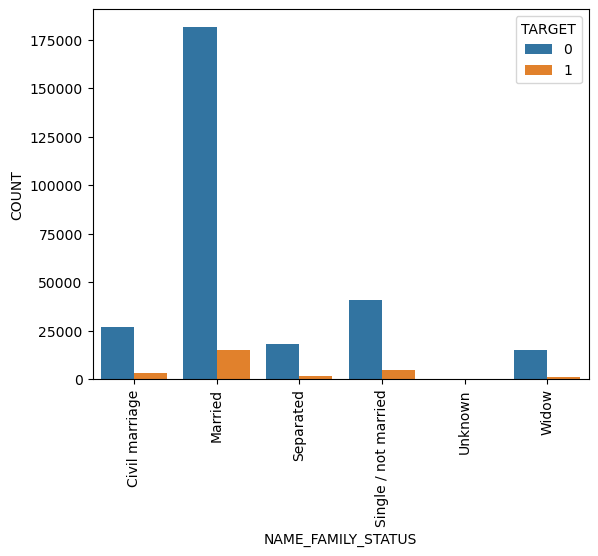

In [334]:

df= app_df1.groupby(by=['NAME_FAMILY_STATUS','TARGET']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_FAMILY_STATUS', y='COUNT', hue='TARGET', data=df)
plt.xticks(rotation = 90)
plt.show()

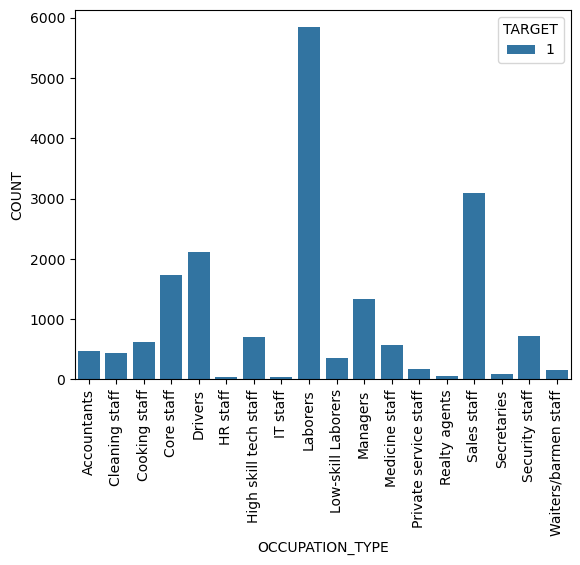

In [338]:
df = app_df1[~(app_df1['OCCUPATION_TYPE'] == 'NA') & (app_df1['TARGET']== 1)]
df= df.groupby(by=['OCCUPATION_TYPE','TARGET']).size().reset_index(name='COUNT')
sns.barplot(x='OCCUPATION_TYPE', y='COUNT', hue='TARGET', data=df)
plt.xticks(rotation = 90)
plt.show()

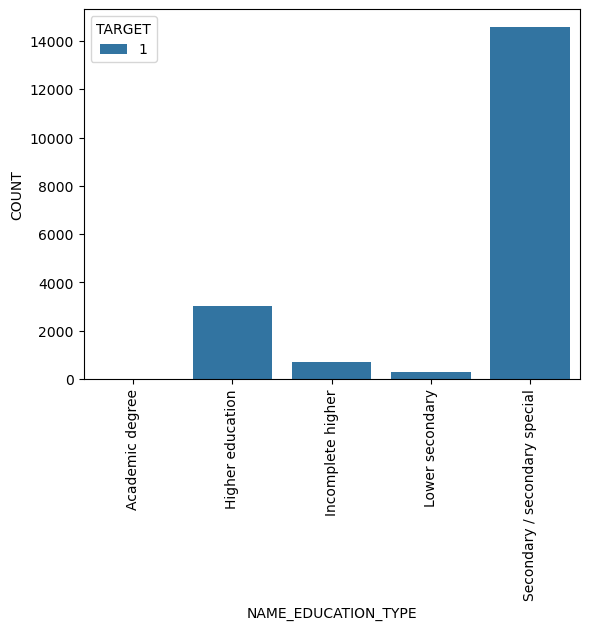

In [339]:
df = app_df1[~(app_df1['OCCUPATION_TYPE'] == 'NA') & (app_df1['TARGET']== 1)]
df= df.groupby(by=['NAME_EDUCATION_TYPE','TARGET']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_EDUCATION_TYPE', y='COUNT', hue='TARGET', data=df)
plt.xticks(rotation = 90)
plt.show()

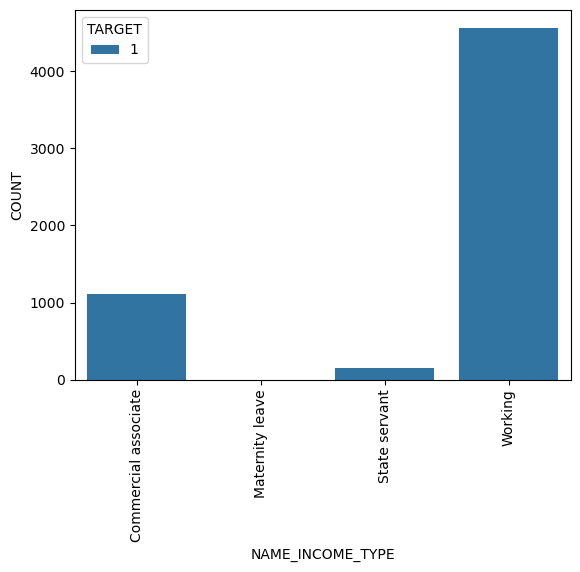

In [344]:
df = app_df1[(app_df1['OCCUPATION_TYPE'] == 'Laborers') & (app_df1['TARGET']== 1)]
df= df.groupby(by=['NAME_INCOME_TYPE','TARGET']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_INCOME_TYPE', y='COUNT', hue='TARGET', data=df)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='INCOME_LEVEL'>

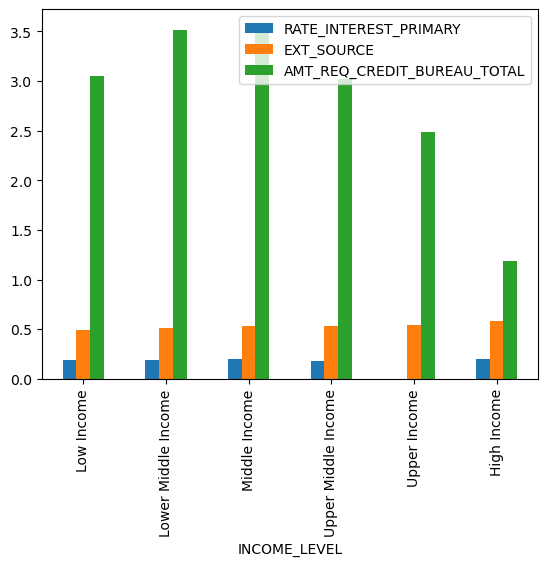

In [120]:
app_df2.groupby(by=['INCOME_LEVEL'])[['RATE_INTEREST_PRIMARY','EXT_SOURCE','AMT_REQ_CREDIT_BUREAU_TOTAL']].mean().plot.bar()

<Axes: xlabel='INCOME_LEVEL'>

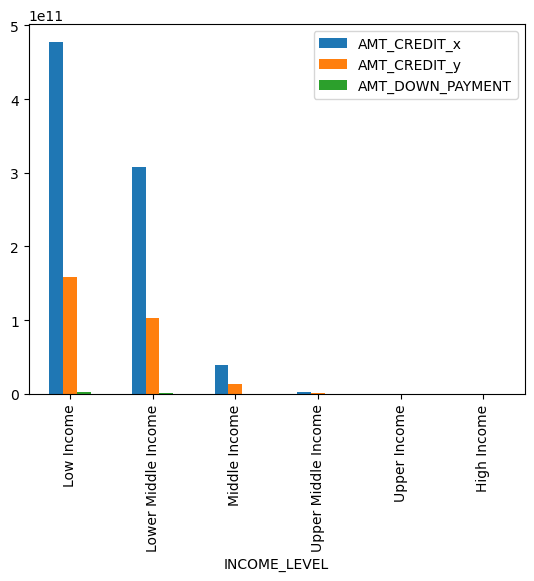

In [121]:
app_df2.groupby(by=['INCOME_LEVEL'])[['AMT_CREDIT_x','AMT_CREDIT_y','AMT_DOWN_PAYMENT']].sum().plot.bar()

<Axes: xlabel='NAME_INCOME_TYPE'>

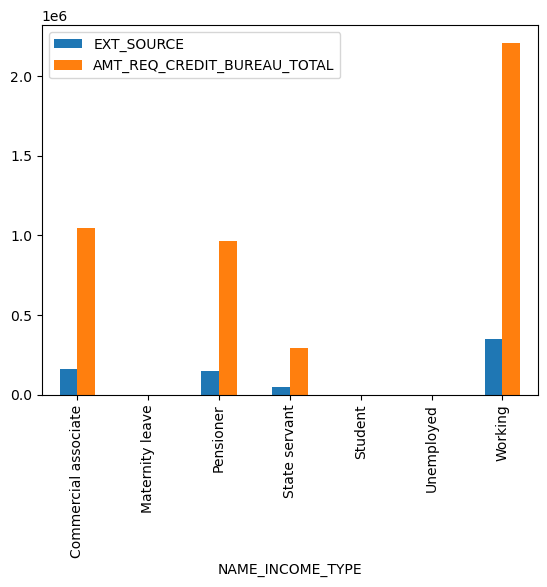

In [352]:
app_df2.groupby(by=['NAME_INCOME_TYPE'])[['EXT_SOURCE','AMT_REQ_CREDIT_BUREAU_TOTAL']].sum().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Commercial associate'),
  Text(1, 0, 'Maternity leave'),
  Text(2, 0, 'Pensioner'),
  Text(3, 0, 'State servant'),
  Text(4, 0, 'Student'),
  Text(5, 0, 'Unemployed'),
  Text(6, 0, 'Working')])

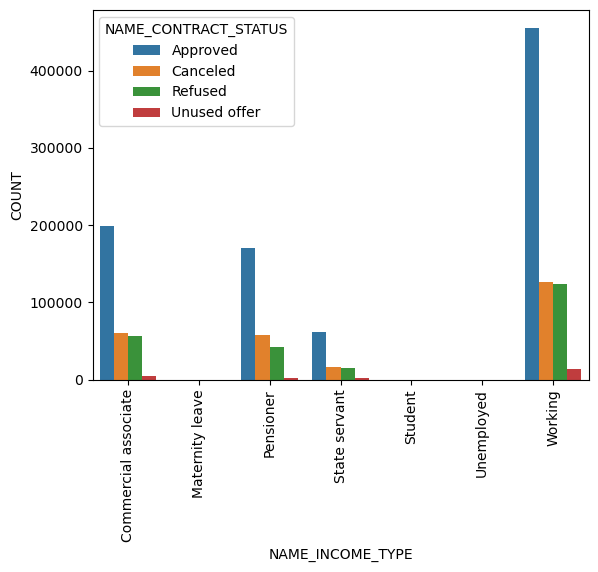

In [123]:
df = app_df2.groupby(['NAME_INCOME_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_INCOME_TYPE', y='COUNT', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Academic degree'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Secondary / secondary special')])

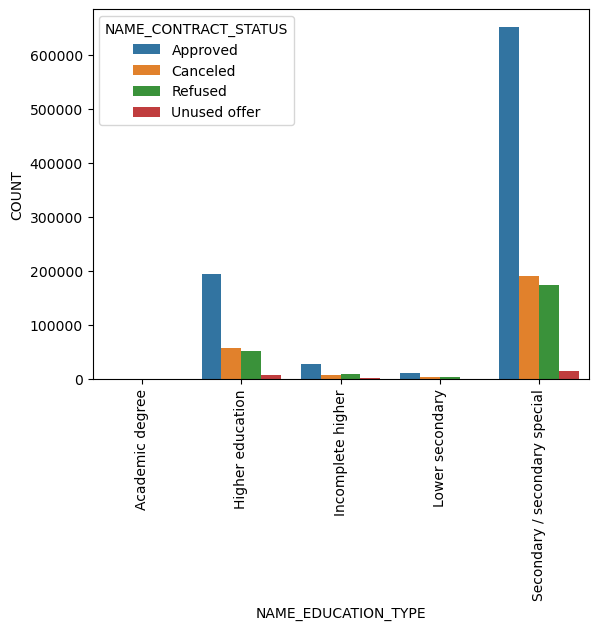

In [124]:
df = app_df2.groupby(['NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_EDUCATION_TYPE', y='COUNT', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)

<Axes: xlabel='NAME_EDUCATION_TYPE'>

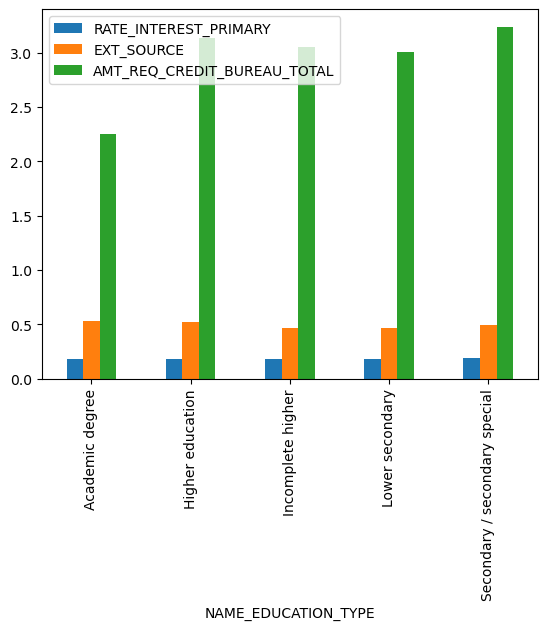

In [125]:
app_df2.groupby(by=['NAME_EDUCATION_TYPE'])[['RATE_INTEREST_PRIMARY','EXT_SOURCE','AMT_REQ_CREDIT_BUREAU_TOTAL']].mean().plot.bar()

<Axes: xlabel='NAME_EDUCATION_TYPE'>

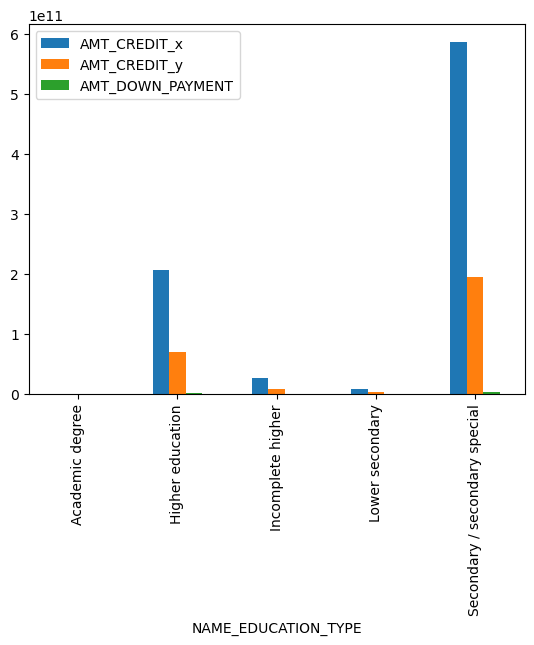

In [126]:
app_df2.groupby(by=['NAME_EDUCATION_TYPE'])[['AMT_CREDIT_x','AMT_CREDIT_y','AMT_DOWN_PAYMENT']].sum().plot.bar()

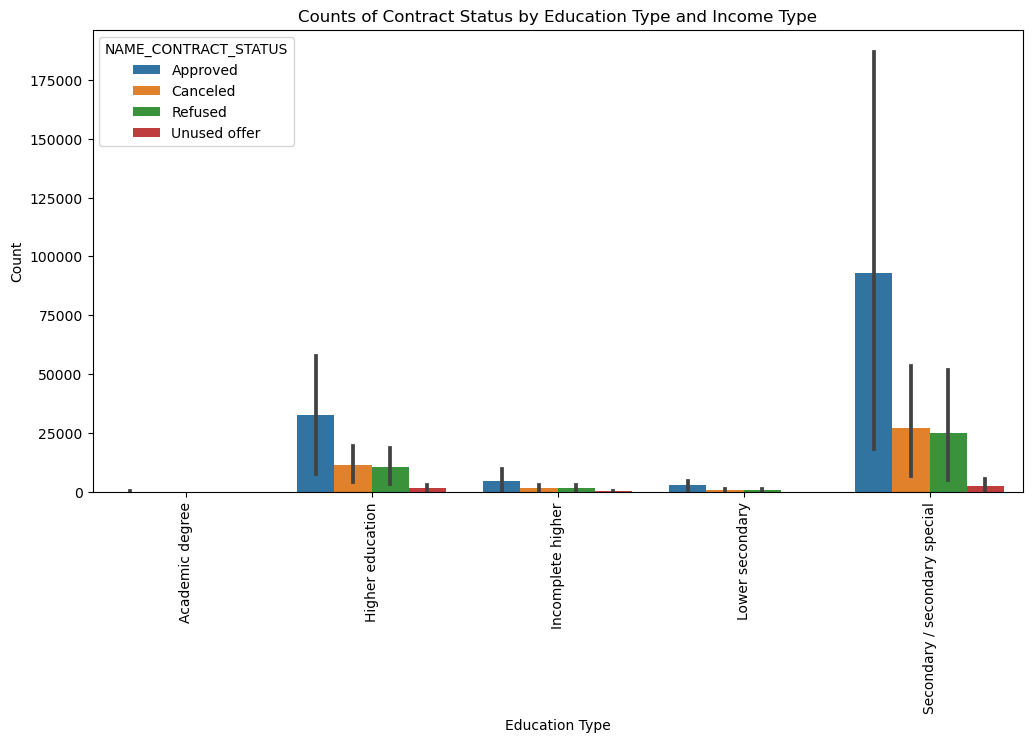

In [127]:
df = app_df2.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='COUNT', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation=90)
plt.title('Counts of Contract Status by Education Type and Income Type')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()


In [128]:
df = app_df2.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')



<Figure size 700x700 with 0 Axes>

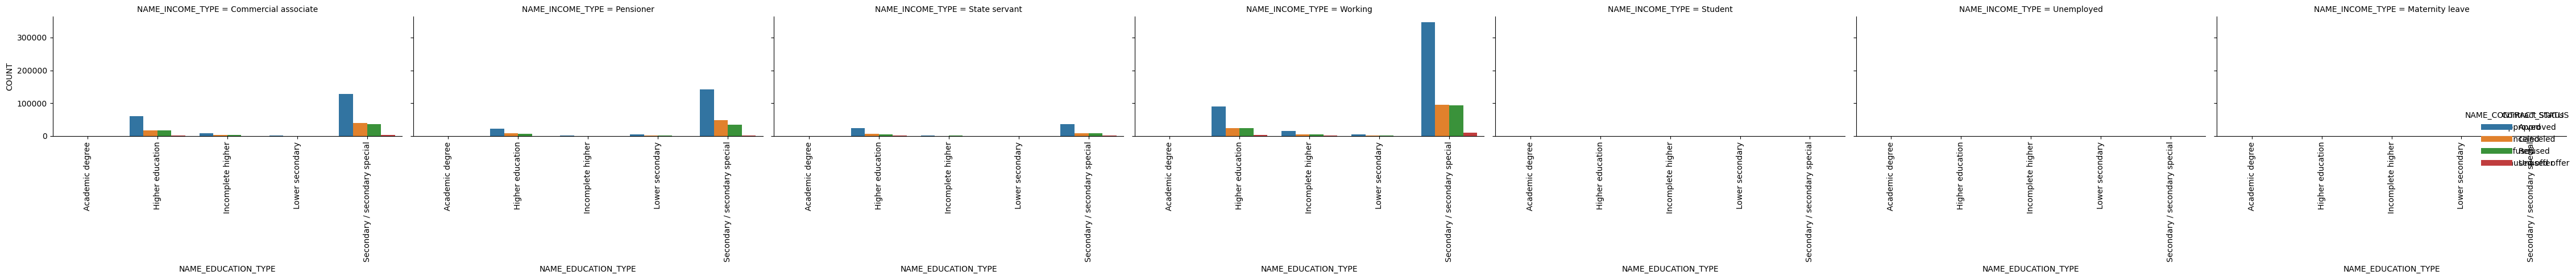

In [129]:
plt.figure(figsize=(7,7))
g = sns.catplot(
    x='NAME_EDUCATION_TYPE',
    y='COUNT',
    hue='NAME_CONTRACT_STATUS',
    col='NAME_INCOME_TYPE',
    data=df,
    kind='bar',
    height=5,
    aspect=1.2,
)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels for better readability
g.add_legend(title='Contract Status')
plt.tight_layout()
plt.show()

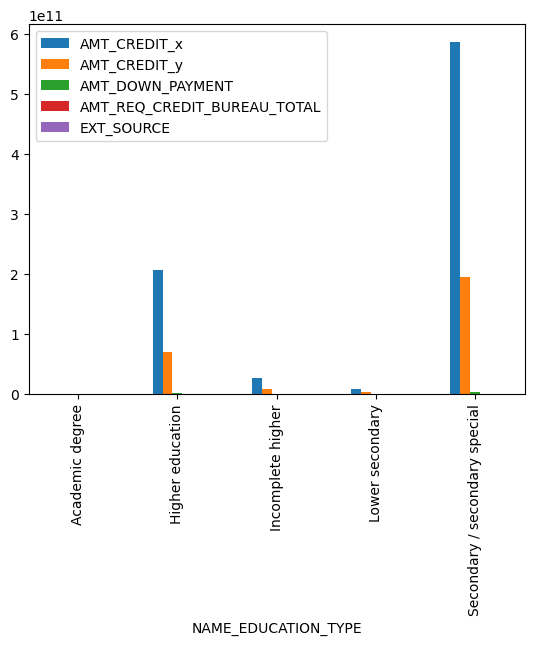

AMT_CREDIT_x    AMT_CREDIT_y  \
NAME_EDUCATION_TYPE                                             
Academic degree                  413686332.00    137610012.33   
Higher education              205585652488.50  69014244281.31   
Incomplete higher              25779680055.00   8387086231.35   
Lower secondary                 8464022842.50   2748886244.10   
Secondary / secondary special 586242947353.50 194931347487.35   

                               AMT_DOWN_PAYMENT  AMT_REQ_CREDIT_BUREAU_TOTAL  \
NAME_EDUCATION_TYPE                                                            
Academic degree                      2946801.51                      1302.00   
Higher education                  1269242749.58                    974640.00   
Incomplete higher                  166801380.34                    137265.00   
Lower secondary                     41451916.59                     51338.00   
Secondary / secondary special     2939635055.93                   3343456.00   

                               EXT_SOURCE  CURRENT_VS_PREV_CREDIT  \
NAME_EDUCATION_TYPE                                                 
Academic degree                    305.89                    3.01   
Higher education                163272.61                    2.98   
Incomplete higher                21118.78                    3.07   
Lower secondary                   7935.48                    3.08   
Secondary / secondary special   512553.35                    3.01   

                               CURRENT_VS_PREV_DPT  CURRENT_INQ_VS_EXT  
NAME_EDUCATION_TYPE                                                     
Academic degree                             140.38                4.26  
Higher education                            161.98                5.97  
Incomplete higher                           154.55                6.50  
Lower secondary                             204.19                6.47  
Secondary / secondary special               199.43                6.52

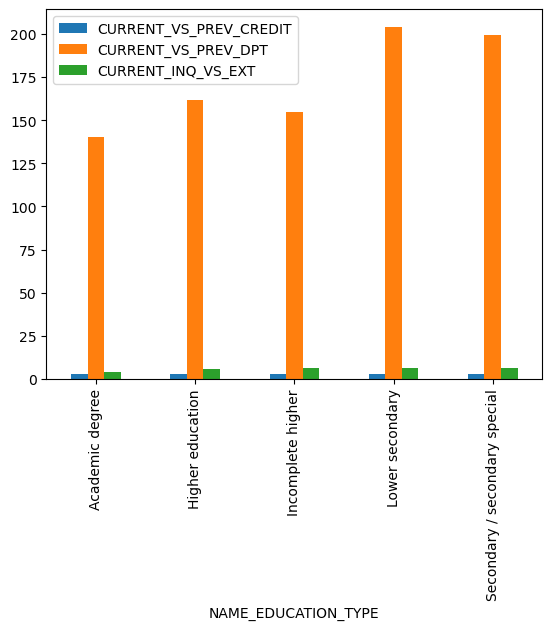

In [130]:
df = app_df2.groupby(['NAME_EDUCATION_TYPE'])[['AMT_CREDIT_x','AMT_CREDIT_y','AMT_DOWN_PAYMENT','AMT_REQ_CREDIT_BUREAU_TOTAL','EXT_SOURCE']].sum()
df.plot.bar()
plt.show()
df['CURRENT_VS_PREV_CREDIT'] = df['AMT_CREDIT_x']/df['AMT_CREDIT_y']
df['CURRENT_VS_PREV_DPT'] = df['AMT_CREDIT_x']/df['AMT_DOWN_PAYMENT']
df['CURRENT_INQ_VS_EXT'] = df['AMT_REQ_CREDIT_BUREAU_TOTAL']/df['EXT_SOURCE']

df[['CURRENT_VS_PREV_CREDIT','CURRENT_VS_PREV_DPT','CURRENT_INQ_VS_EXT']].plot.bar()

df

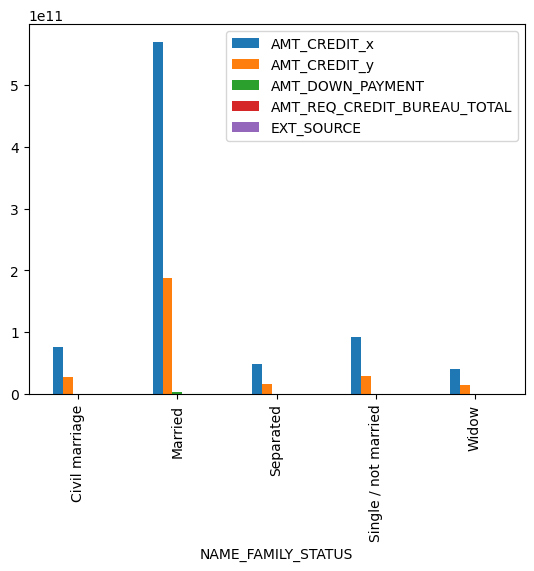

AMT_CREDIT_x    AMT_CREDIT_y  AMT_DOWN_PAYMENT  \
NAME_FAMILY_STATUS                                                       
Civil marriage        76563437877.00  26965022580.58      424789514.24   
Married              569359950678.00 187287607188.54     2913917284.39   
Separated             49024668321.00  16532590947.93      271876874.13   
Single / not married  91930951350.00  29774811357.76      613974368.75   
Widow                 39606980845.50  14659142181.61      195519862.44   

                      AMT_REQ_CREDIT_BUREAU_TOTAL  EXT_SOURCE  \
NAME_FAMILY_STATUS                                              
Civil marriage                          452039.00    69394.00   
Married                                2914148.00   457353.43   
Separated                               295117.00    46748.80   
Single / not married                    562430.00    88695.22   
Widow                                   284267.00    42994.66   

                      CURRENT_VS_PREV_CREDIT  CURRENT_VS_PREV_DPT  \
NAME_FAMILY_STATUS                                                  
Civil marriage                          2.84               180.24   
Married                                 3.04               195.39   
Separated                               2.97               180.32   
Single / not married                    3.09               149.73   
Widow                                   2.70               202.57   

                      CURRENT_INQ_VS_EXT  
NAME_FAMILY_STATUS                        
Civil marriage                      6.51  
Married                             6.37  
Separated                           6.31  
Single / not married                6.34  
Widow                               6.61

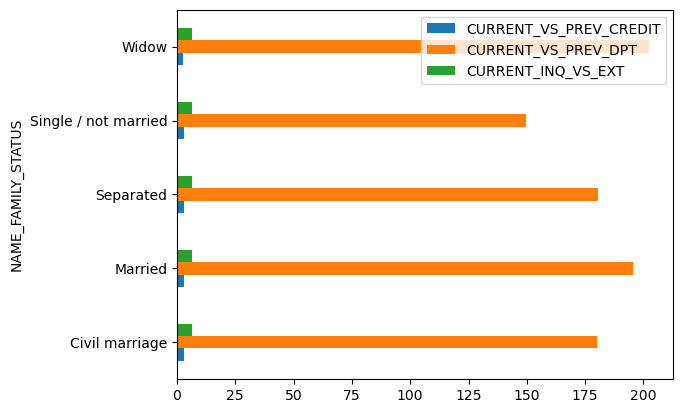

In [131]:
df = app_df2.groupby(['NAME_FAMILY_STATUS'])[['AMT_CREDIT_x','AMT_CREDIT_y','AMT_DOWN_PAYMENT','AMT_REQ_CREDIT_BUREAU_TOTAL','EXT_SOURCE']].sum()
df.plot.bar()
plt.show()
df['CURRENT_VS_PREV_CREDIT'] = df['AMT_CREDIT_x']/df['AMT_CREDIT_y']
df['CURRENT_VS_PREV_DPT'] = df['AMT_CREDIT_x']/df['AMT_DOWN_PAYMENT']
df['CURRENT_INQ_VS_EXT'] = df['AMT_REQ_CREDIT_BUREAU_TOTAL']/df['EXT_SOURCE']

df[['CURRENT_VS_PREV_CREDIT','CURRENT_VS_PREV_DPT','CURRENT_INQ_VS_EXT']].plot.barh()

df

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Civil marriage'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Single / not married'),
  Text(4, 0, 'Widow')])

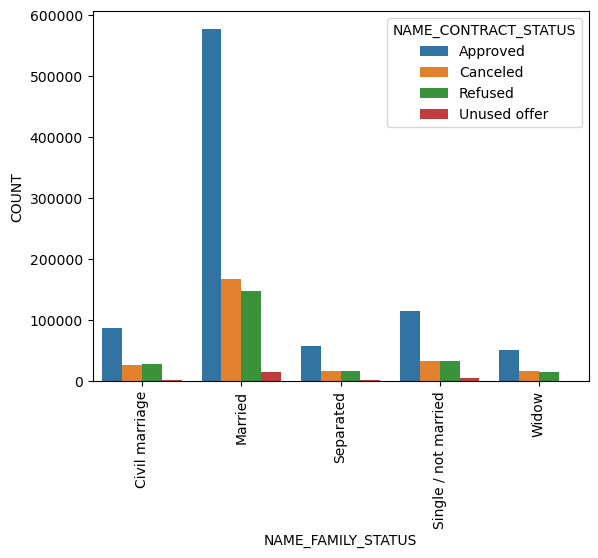

In [132]:
df = app_df2.groupby(['NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')
sns.barplot(x='NAME_FAMILY_STATUS', y='COUNT', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)

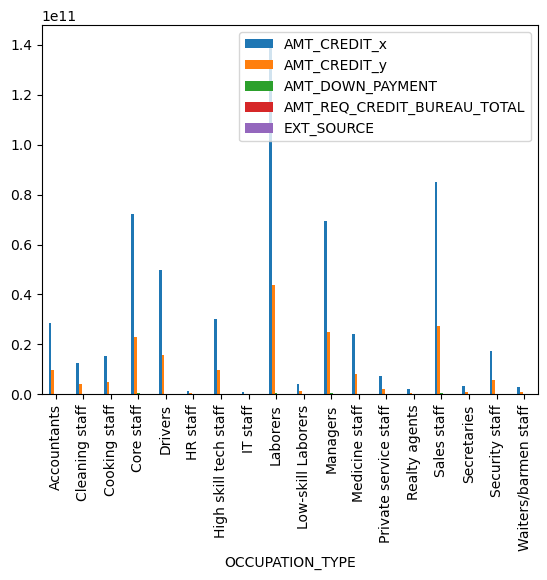

AMT_CREDIT_x   AMT_CREDIT_y  AMT_DOWN_PAYMENT  \
OCCUPATION_TYPE                                                          
Accountants            28576085904.00  9777618489.47      162417125.34   
Cleaning staff         12609351499.50  4372076891.93       48291702.62   
Cooking staff          15487452639.00  4933401005.20       73892178.54   
Core staff             72085026537.00 23060849367.47      417116104.33   
Drivers                49830277504.50 15792339394.08      307677409.65   
HR staff                1467941742.00   511167406.55        9645017.67   
High skill tech staff  30353041426.50  9633776507.55      178696104.57   
IT staff                1043643595.50   311898345.12        8212176.81   
Laborers              140838540322.50 43619506206.89      757941851.97   
Low-skill Laborers      4189462564.50  1242250844.44       21097896.21   
Managers               69273961537.50 25120829055.87      454617170.95   
Medicine staff         24064397698.50  8117071960.95      107995338.50   
Private service staff   7570906272.00  2319935350.09       42843256.88   
Realty agents           2208191107.50   750300851.70       14918636.29   
Sales staff            84971454921.00 27435069979.20      440070105.60   
Secretaries             3408696108.00  1061245736.46       17021907.36   
Security staff         17322533460.00  5664824154.27       81418576.32   
Waiters/barmen staff    3046188253.50  1009381393.71       19855409.80   

                       AMT_REQ_CREDIT_BUREAU_TOTAL  EXT_SOURCE  \
OCCUPATION_TYPE                                                  
Accountants                              130730.00    22510.35   
Cleaning staff                            82442.00    11895.11   
Cooking staff                             88674.00    13440.87   
Core staff                               357266.00    59022.77   
Drivers                                  257073.00    40308.97   
HR staff                                   7586.00     1210.28   
High skill tech staff                    149386.00    24950.22   
IT staff                                   4980.00      870.17   
Laborers                                 778594.00   119491.61   
Low-skill Laborers                        27514.00     3952.97   
Managers                                 295979.00    49549.27   
Medicine staff                           125606.00    20202.80   
Private service staff                     38709.00     6315.59   
Realty agents                             11010.00     1790.88   
Sales staff                              467619.00    72605.03   
Secretaries                               18565.00     2961.31   
Security staff                           104611.00    15192.29   
Waiters/barmen staff                      18349.00     2832.37   

                       CURRENT_VS_PREV_CREDIT  CURRENT_VS_PREV_DPT  \
OCCUPATION_TYPE                                                      
Accountants                              2.92               175.94   
Cleaning staff                           2.88               261.11   
Cooking staff                            3.14               209.60   
Core staff                               3.13               172.82   
Drivers                                  3.16               161.96   
HR staff                                 2.87               152.20   
High skill tech staff                    3.15               169.86   
IT staff                                 3.35               127.08   
Laborers                                 3.23               185.82   
Low-skill Laborers                       3.37               198.57   
Managers                                 2.76               152.38   
Medicine staff                           2.96               222.83   
Private service staff                    3.26               176.71   
Realty agents                            2.94               148.02   
Sales staff                              3.10               193.09   
Secretaries                      

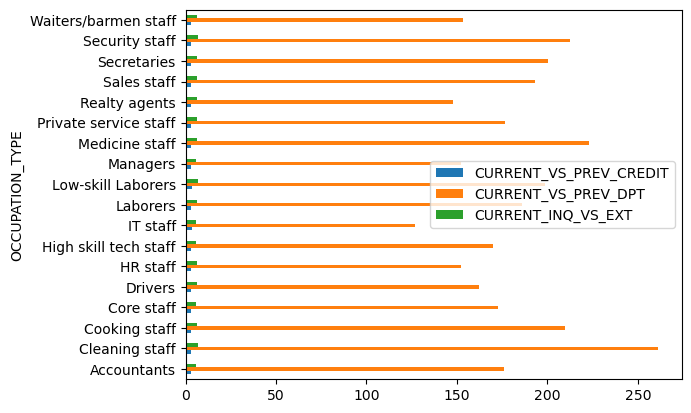

In [355]:
df = app_df2[~(app_df2['OCCUPATION_TYPE'] == 'NA')]
df = df.groupby(['OCCUPATION_TYPE'])[['AMT_CREDIT_x','AMT_CREDIT_y','AMT_DOWN_PAYMENT','AMT_REQ_CREDIT_BUREAU_TOTAL','EXT_SOURCE']].sum()
df.plot.bar()
plt.show()
df['CURRENT_VS_PREV_CREDIT'] = df['AMT_CREDIT_x']/df['AMT_CREDIT_y']
df['CURRENT_VS_PREV_DPT'] = df['AMT_CREDIT_x']/df['AMT_DOWN_PAYMENT']
df['CURRENT_INQ_VS_EXT'] = df['AMT_REQ_CREDIT_BUREAU_TOTAL']/df['EXT_SOURCE']

df[['CURRENT_VS_PREV_CREDIT','CURRENT_VS_PREV_DPT','CURRENT_INQ_VS_EXT']].plot.barh()

df

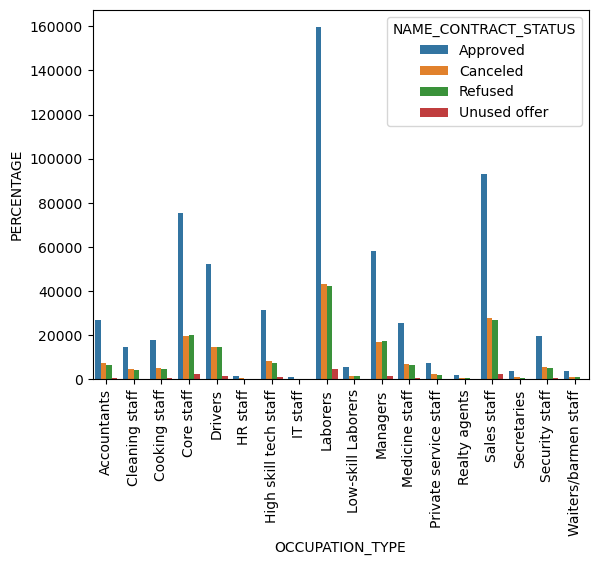

In [356]:
df = (app_df2[~(app_df2['OCCUPATION_TYPE'] =='NA')].groupby(['OCCUPATION_TYPE','NAME_CONTRACT_STATUS']).size()).reset_index(name='PERCENTAGE')
sns.barplot(x='OCCUPATION_TYPE', y='PERCENTAGE', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)
plt.show()

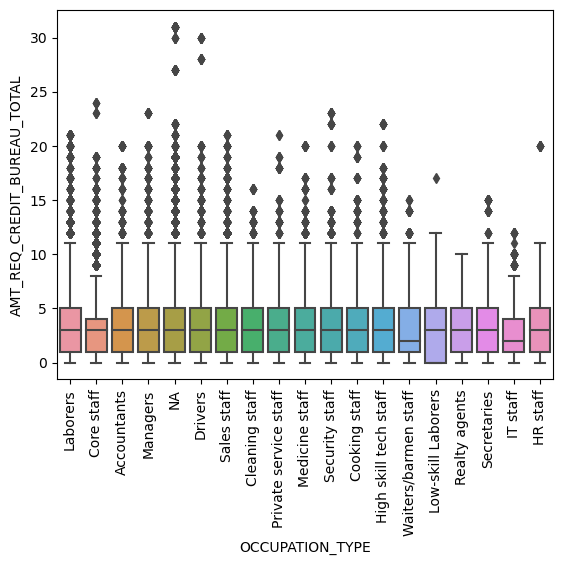

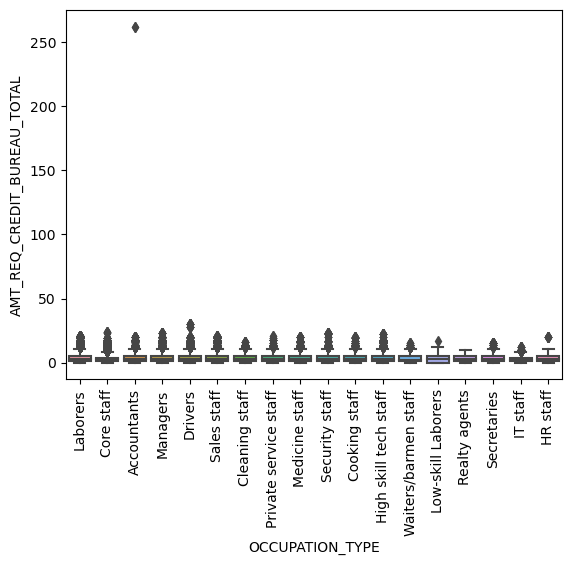

In [135]:
df = app_df2[(app_df2['AMT_REQ_CREDIT_BUREAU_TOTAL'] < 250)]
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_REQ_CREDIT_BUREAU_TOTAL", data=df)
plt.xticks(rotation = 90)
plt.show()

df = app_df2[~(app_df2['OCCUPATION_TYPE'] =='NA')]
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_REQ_CREDIT_BUREAU_TOTAL", data=df)
plt.xticks(rotation = 90)
plt.show()

In [136]:
df = app_df2[(app_df2['AMT_REQ_CREDIT_BUREAU_TOTAL'] > 250)]
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1093650      377322       0           Cash loans           F            N   
1093651      377322       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
1093650               Y             1          Working    Higher education   
1093651               Y             1          Working    Higher education   

        NAME_FAMILY_STATUS  ... CNT_PAYMENT  NAME_YIELD_GROUP  \
1093650            Married  ...       12.00        low_normal   
1093651            Married  ...        0.00               XNA   

                PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1093650  POS industry with interest          365243.00        -663.00   
1093651                 Card X-Sell            -377.00        -351.00   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1093650                    -333.00        -333.00           -330.00   
1093651                  365243.00      365243.00         365243.00   

        NFLAG_INSURED_ON_APPROVAL  AMT_REQ_CREDIT_BUREAU_TOTAL  
1093650                      0.00                       262.00  
1093651                      0.00                       262.00  

[2 rows x 73 columns]

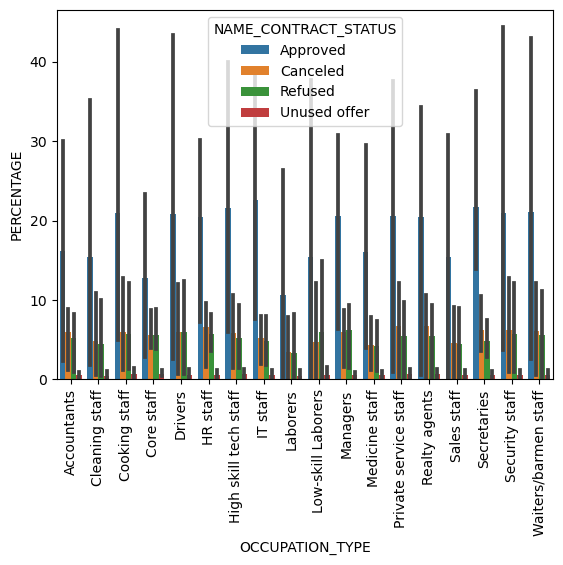

In [137]:
df = (app_df2[~(app_df2['OCCUPATION_TYPE'] =='NA')].groupby(['OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_CONTRACT_STATUS']).size() / app_df2[~(app_df2['OCCUPATION_TYPE'] =='NA')].groupby(['OCCUPATION_TYPE']).size() * 100).reset_index(name='PERCENTAGE')
sns.barplot(x='OCCUPATION_TYPE', y='PERCENTAGE', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)
plt.show()

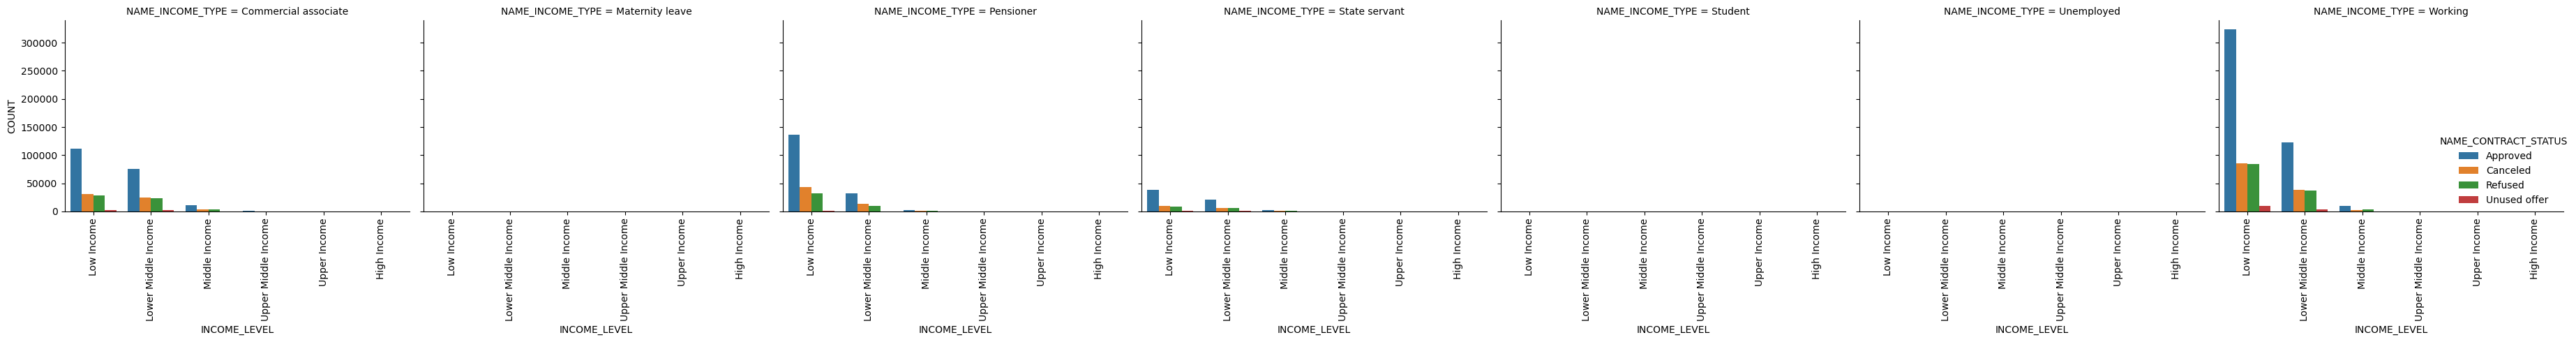

In [138]:
df = app_df2.groupby(['INCOME_LEVEL','NAME_INCOME_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')


#sns.barplot(x="INCOME_LEVEL", y="NAME_INCOME_TYPE", hue="Category2", data=data)

g = sns.catplot(x="INCOME_LEVEL", y="COUNT", hue="NAME_CONTRACT_STATUS", col="NAME_INCOME_TYPE", data=df, kind="bar")
g.set_xticklabels(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [139]:
### Other categories

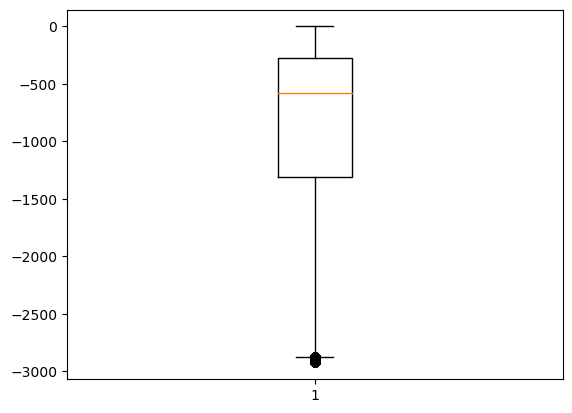

max        1.00
mean     879.02
median   581.00
Name: DAYS_DECISION, dtype: float64

In [140]:
plt.boxplot(app_df2['DAYS_DECISION'])
plt.show()
-app_df2['DAYS_DECISION'].aggregate(['max','mean','median'])

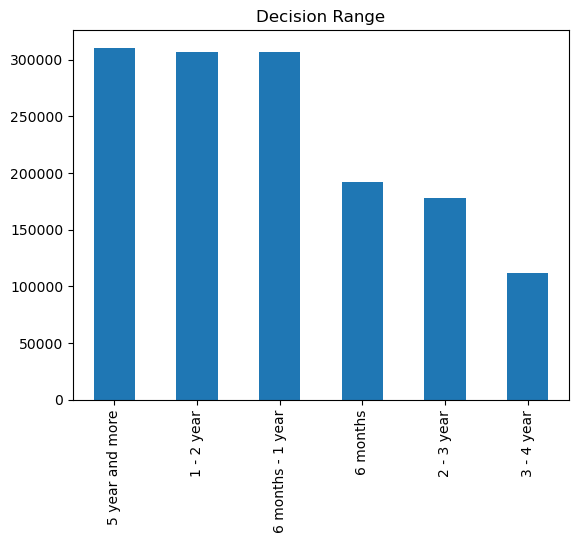

5 year and more      310381
1 - 2 year           307105
6 months - 1 year    306537
6 months             192421
2 - 3 year           178237
3 - 4 year           111655
Name: DECISON_RANGE, dtype: int64

In [358]:

bins = [0, 180, 365,730,1095,1460,float('inf')]
labels = ['6 months', '6 months - 1 year', '1 - 2 year', '2 - 3 year', '3 - 4 year', '5 year and more']


app_df2['DECISON_RANGE'] = pd.cut(-app_df2['DAYS_DECISION'],bins, labels= labels)

app_df2['DECISON_RANGE'].value_counts().plot.bar()
plt.title('Decision Range')
plt.show()
app_df2['DECISON_RANGE'].value_counts()

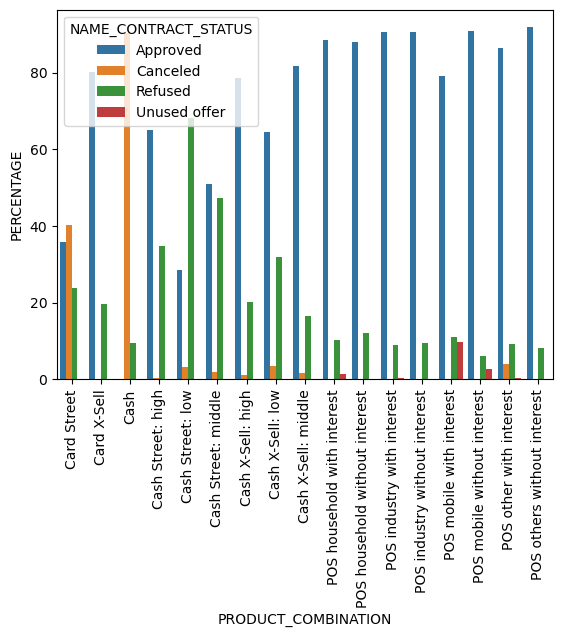

In [142]:
df = (app_df2[~(app_df2['PRODUCT_COMBINATION'] =='NA')].groupby(['PRODUCT_COMBINATION','NAME_CONTRACT_STATUS']).size() / app_df2.groupby(['PRODUCT_COMBINATION']).size() * 100).reset_index(name='PERCENTAGE')
sns.barplot(x='PRODUCT_COMBINATION', y='PERCENTAGE', hue='NAME_CONTRACT_STATUS', data=df)
plt.xticks(rotation = 90)
plt.show()

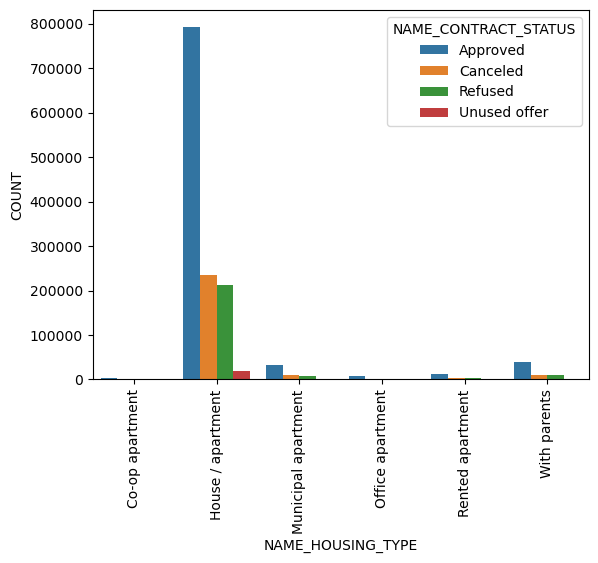

In [143]:
df = app_df2.groupby(['NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')

sns.barplot(x="NAME_HOUSING_TYPE", y="COUNT", hue="NAME_CONTRACT_STATUS", data=df)
plt.xticks(rotation = 90)
plt.show()



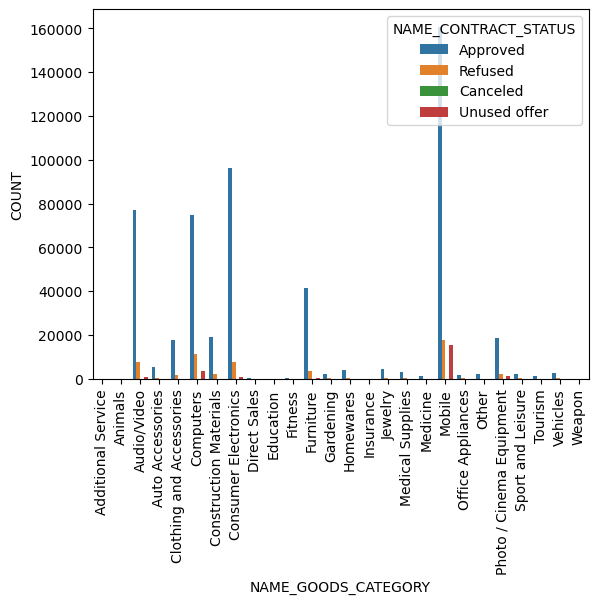

In [144]:
df = app_df2[~(app_df2['NAME_GOODS_CATEGORY'] == 'XNA')].groupby(['NAME_GOODS_CATEGORY','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')

sns.barplot(x="NAME_GOODS_CATEGORY", y="COUNT", hue="NAME_CONTRACT_STATUS", data=df)
plt.xticks(rotation = 90)
plt.show()




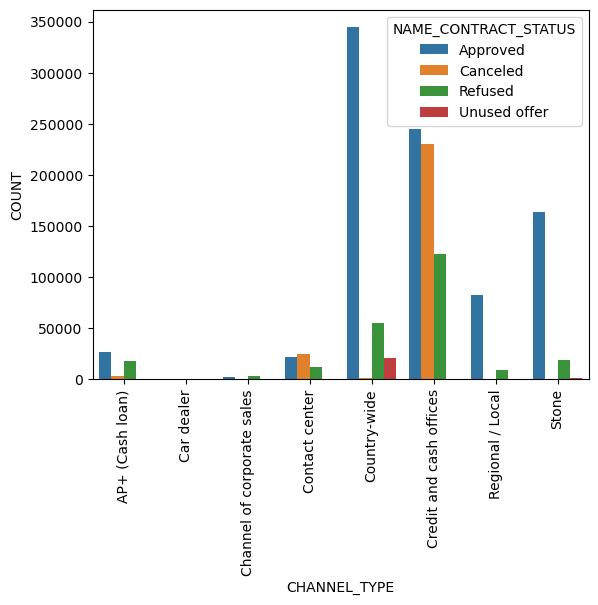

In [145]:
df = app_df2.groupby(['CHANNEL_TYPE','NAME_CONTRACT_STATUS']).size().reset_index(name='COUNT')

sns.barplot(x="CHANNEL_TYPE", y="COUNT", hue="NAME_CONTRACT_STATUS", data=df)
plt.xticks(rotation = 90)
plt.show()





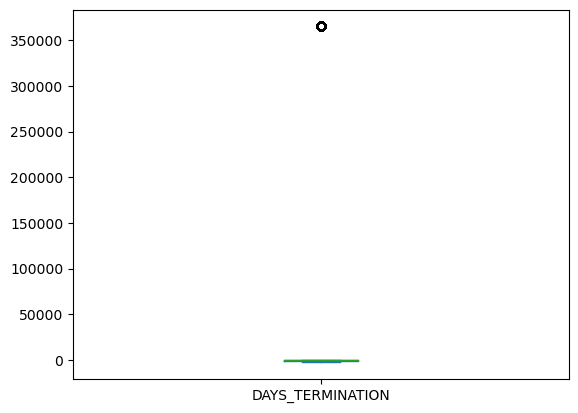

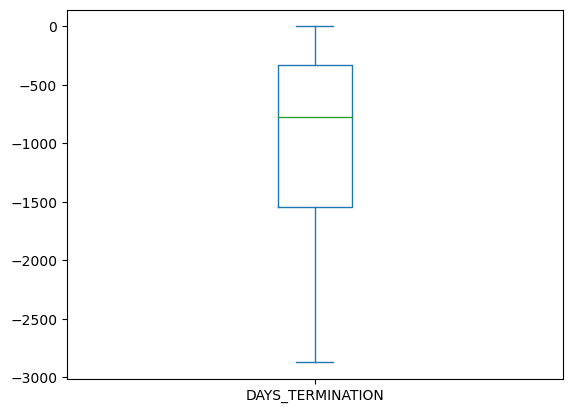

mean   max      min
DECISON_RANGE                            
6 months            -51.61 -2.00  -171.00
6 months - 1 year  -123.40 -2.00  -337.00
1 - 2 year         -296.55 -2.00  -725.00
2 - 3 year         -574.57 -2.00 -1070.00
3 - 4 year         -925.80 -2.00 -1405.00
5 year and more   -1801.43 -2.00 -2874.00

In [146]:

app_df2['DAYS_TERMINATION'].plot.box()
plt.show()

df = app_df2[app_df2['DAYS_TERMINATION'] < 350000]
df['DAYS_TERMINATION'].plot.box()
plt.show()

df.groupby(by=('DECISON_RANGE'))['DAYS_TERMINATION'].aggregate(['mean','max','min'])




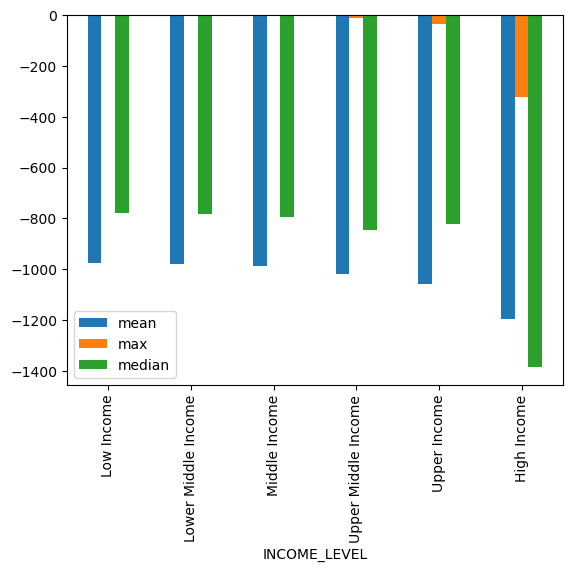

mean     max   median
INCOME_LEVEL                                 
Low Income           -975.26   -2.00  -779.00
Lower Middle Income  -978.93   -2.00  -782.00
Middle Income        -986.85   -2.00  -793.00
Upper Middle Income -1020.00  -11.00  -845.00
Upper Income        -1056.50  -35.00  -822.00
High Income         -1197.15 -321.00 -1386.00

In [147]:
df.groupby(by=('INCOME_LEVEL'))['DAYS_TERMINATION'].aggregate(['mean','max','median']).plot.bar()
plt.show()
df.groupby(by=('INCOME_LEVEL'))['DAYS_TERMINATION'].aggregate(['mean','max','median'])